1. Acceptance rate for each combinations:

In [55]:
%pip install pandas seaborn matplotlib statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.9 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.9 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.9 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 8.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.9 MB 9.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.9 MB 9.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.9 MB 8.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.9 MB 8.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.8/9.9 MB 9.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.4/9.9 MB 9.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 9.6 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mijsters\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Create CSV

In [64]:
import os
import pandas as pd
import json

# Directory where JSON files are stored
folder_path = 'Pilot Data'

# Reward categories
LOW_REWARDS = [0.5, 1.5]
LOW_MEDIUM_REWARDS = [4.5, 5.5]
MEDIUM_REWARDS = [9.5, 10.5]
MEDIUM_HIGH_REWARDS = [19.5, 20.5]
HIGH_REWARDS = [39.5, 40.5]

def categorize_reward(reward):
    if LOW_REWARDS[0] <= reward <= LOW_REWARDS[1]:
        return '0'
    elif LOW_MEDIUM_REWARDS[0] <= reward <= LOW_MEDIUM_REWARDS[1]:
        return '1'
    elif MEDIUM_REWARDS[0] <= reward <= MEDIUM_REWARDS[1]:
        return '2'
    elif MEDIUM_HIGH_REWARDS[0] <= reward <= MEDIUM_HIGH_REWARDS[1]:
        return '3'
    elif HIGH_REWARDS[0] <= reward <= HIGH_REWARDS[1]:
        return '4'
    else:
        return 'Other'

def categorize_effort_bounds(effort_bounds):    
    if effort_bounds == [5, 23]:
        return '0'
    elif effort_bounds == [23, 41]:
        return '1'
    elif effort_bounds == [41, 59]:
        return '2'
    elif effort_bounds == [59, 77]:
        return '3'
    elif effort_bounds == [77, 95]:
        return '4'
    else:
        return 'Other'
 

def map_delay_condition(delay):
    if delay == [0, 0]:
        return '0'
    elif delay == [0, 1000]:
        return '1'
    else:
        return 'Other'

# Check if the data folder exists
if not os.path.exists(folder_path):
    print("Data folder does not exist.")
else:
    print(f"Accessing data folder: {folder_path}")

# Create an empty list to collect all trials data
all_trials = []

number_of_blocks = 8
number_of_trials_per_block = 75

# Loop through all files in the data folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        print(f"Found file: {filename}")
        json_path = os.path.join(folder_path, filename)
        
        with open(json_path, "r", encoding="utf-8") as json_file:
            trial_number = 0
            block_number = 0
            data = json.load(json_file)
            participant_id = filename.split("_")[1]
            
            # Convert JSON data into a DataFrame
            df = pd.DataFrame(data)
            
            # Step 1: Filter for task = 'accept'
            df_accept = df[df['task'] == 'accept'].copy()

            # Step 2: Loop through each row (trial) and collect the necessary information
            for index, row in df.iterrows():
                if row['task'] == 'accept':
                    participant_id = participant_id  
                    block_number = block_number // number_of_trials_per_block 
                    trial_number = trial_number  
                    delay_condition = row['delay']
                    reward_condition = row['reward']
                    effort_condition = row['originalBounds']
                    acceptance = 1 if row['response'] == 'ArrowRight' else 0  # Assuming 'ArrowRight' means accept
                    # Step 3: Look ahead to determine success value based on the `task-plugin` trial
                    success = -1  # Default to failure (-1) if no success is found
                    
                    # Check if the next trial (two trials later) is a task-plugin trial
                    try:
                        next_trial = df.iloc[index + 2]  # Get trial 2 steps after current trial
                        if next_trial['trial_type'] == 'task-plugin':  # Check if it is a task-plugin trial
                            success = 1 if next_trial['success'] else 0
                    except IndexError:
                        # If there is no trial two steps later, success remains -1
                        pass

                    # Collect data for this trial
                    trial_data = {
                        'participant_id': participant_id,
                        'block': block_number,
                        'trial': trial_number,
                        'delay': map_delay_condition(delay_condition),
                        'reward': categorize_reward(reward_condition),
                        'effort': categorize_effort_bounds(effort_condition),
                        'acceptance': acceptance,
                        'success': success
                    }
                    trial_number += 1
                    # Add the trial data to the list
                    all_trials.append(trial_data)

# Create a DataFrame from the list of trial data
trials_df = pd.DataFrame(all_trials)

# Define output CSV file path
output_csv_path = os.path.join(folder_path, 'all_trials.csv')

# Save the DataFrame to a CSV file
trials_df.to_csv(output_csv_path, index=False)

print(f"CSV file saved at: {output_csv_path}")


Accessing data folder: Pilot Data
Found file: numerosity_5adef850eb60400001539109_2025-03-05T19_54_21.326Z_20250306_09.03.json
Found file: numerosity_5d7472ad3bc4020015f3bb56_2025-03-06T19_12_57.668Z_20250317_14.02.json
Found file: numerosity_63cff262503b56190be3eb18_2025-03-06T21_13_32.192Z_20250317_14.02.json
Found file: numerosity_6562025a6e3331528cf8fb3d_2025-03-06T20_47_39.480Z_20250317_14.02.json
Found file: numerosity_6612c945cebe319d923b80f8_2025-03-06T19_41_39.464Z_20250317_14.02.json
Found file: numerosity_66b5a7ae36e5b931db863954_2025-03-05T19_14_11.010Z_20250306_09.03.json
Found file: numerosity_6773fc8590d7b54b0d580e6b_2025-03-06T21_43_44.383Z_20250317_14.02.json
Found file: numerosity_6785b7dd6705050739feb0ad_2025-03-05T19_38_14.876Z_20250306_09.03.json
Found file: numerosity_678fa07cd72c816bac76bda5_2025-03-05T19_24_37.980Z_20250306_09.03.json
Found file: numerosity_67ac2151e5b37e0b91a5af0e_2025-03-05T19_09_18.774Z_20250306_09.03.json
CSV file saved at: Pilot Data\all_tr

# Overall Acceptance Rates

## Generate Overall Acceptance Rates based on CSV

             Participant ID  Block Number  Trial Number Delay Condition  \
0  5adef850eb60400001539109             0             0            sync   
1  5adef850eb60400001539109             0             1            sync   
2  5adef850eb60400001539109             0             2            sync   
3  5adef850eb60400001539109             0             3            sync   
4  5adef850eb60400001539109             0             4            sync   

  Reward Condition Effort Condition  Acceptance  Success  
0           Medium           Medium           1        1  
1       Low-Medium       Low-Medium           1       -1  
2           Medium       Low-Medium           1        1  
3       Low-Medium              Low           1       -1  
4             High             High           1        1  


C:\Users\mijsters\AppData\Local\Temp\ipykernel_31244\1127088103.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_delay.groupby(['reward_group', 'bounds_group']).agg(
C:\Users\mijsters\AppData\Local\Temp\ipykernel_31244\1127088103.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_delay.groupby(['reward_group', 'bounds_group']).agg(


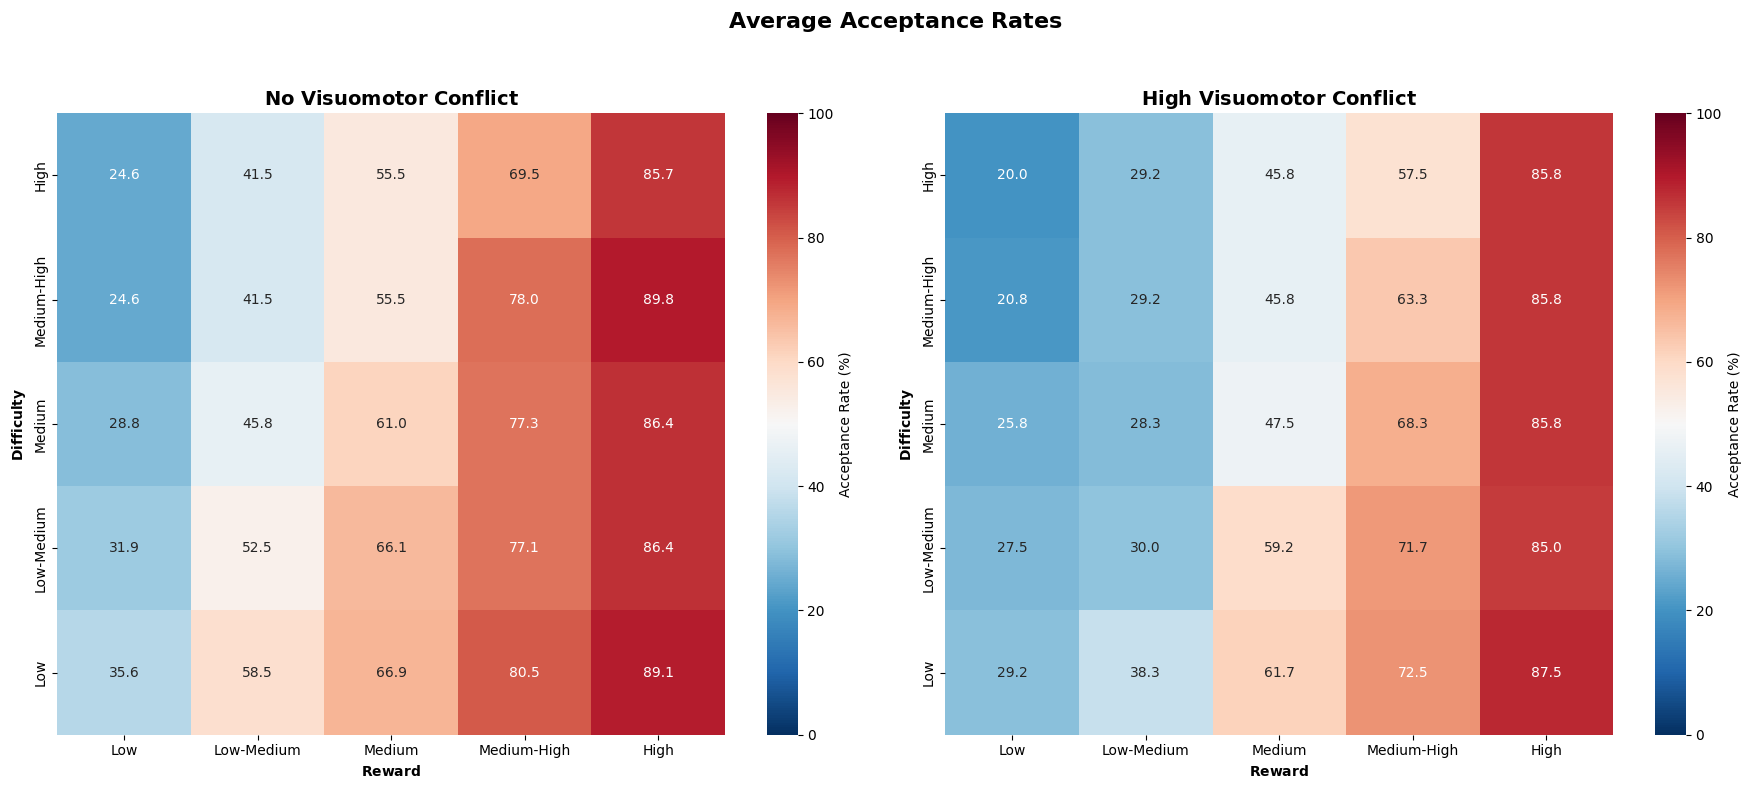

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
csv_path = r'Pilot Data\all_trials.csv'
df = pd.read_csv(csv_path)

# Sanity check: preview the dataframe
print(df.head())

# Rename columns for clarity (optional but helpful)
df.rename(columns={
    'Delay Condition': 'delay',
    'Reward Condition': 'reward_group',
    'Effort Condition': 'bounds_group',
    'Acceptance': 'accepted'
}, inplace=True)

# Reward and bounds orders for consistency
reward_order = ["Low", "Low-Medium", "Medium", "Medium-High", "High"]
bounds_order = ["High", "Medium-High", "Medium", "Low-Medium", "Low"]

# Ensure correct categorical ordering
df['reward_group'] = pd.Categorical(df['reward_group'], categories=reward_order, ordered=True)
df['bounds_group'] = pd.Categorical(df['bounds_group'], categories=bounds_order, ordered=True)

# Map delay strings to display names
plot_titles = {
    'sync': r"$\bf{No\ Visuomotor\ Conflict}$",
    'wideasync': r"$\bf{High\ Visuomotor\ Conflict}$"
}

# Initialize plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Loop over delay conditions
for i, delay in enumerate(['sync', 'wideasync']):
    df_delay = df[df['delay'] == delay]

    # Group by reward and effort, calculate acceptance rates
    grouped = df_delay.groupby(['reward_group', 'bounds_group']).agg(
        total_trials=('accepted', 'count'),
        accepted_trials=('accepted', 'sum')
    ).reset_index()

    grouped['acceptance_rate'] = (grouped['accepted_trials'] / grouped['total_trials']) * 100

    # Pivot for heatmap
    heatmap_data = grouped.pivot(index='bounds_group', columns='reward_group', values='acceptance_rate')

    # Plot
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='RdBu_r',
        vmin=0,
        vmax=100,
        fmt=".1f",
        cbar_kws={'label': 'Acceptance Rate (%)'},
        ax=axes[i]
    )
    
    axes[i].set_title(plot_titles[delay], fontsize=14)
    axes[i].set_xlabel(r"$\bf{Reward}$")
    axes[i].set_ylabel(r"$\bf{Difficulty}$")

# Add a super title and adjust layout
plt.suptitle(r"$\bf{Average\ Acceptance\ Rates}$", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


## Generate Acceptance Rates based on Raw JSON

Accessing data folder: C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data
Processing file: numerosity_5adef850eb60400001539109_2025-03-05T19_54_21.326Z_20250306_09.03.json
Processing file: numerosity_5d7472ad3bc4020015f3bb56_2025-03-06T19_12_57.668Z_20250317_14.02.json
Processing file: numerosity_63cff262503b56190be3eb18_2025-03-06T21_13_32.192Z_20250317_14.02.json
Processing file: numerosity_6562025a6e3331528cf8fb3d_2025-03-06T20_47_39.480Z_20250317_14.02.json
Processing file: numerosity_6612c945cebe319d923b80f8_2025-03-06T19_41_39.464Z_20250317_14.02.json
Processing file: numerosity_66b5a7ae36e5b931db863954_2025-03-05T19_14_11.010Z_20250306_09.03.json
Processing file: numerosity_6773fc8590d7b54b0d580e6b_2025-03-06T21_43_44.383Z_20250317_14.02.json
Processing file: numerosity_6785b7dd6705050739feb0ad_2025-03-05T19_38_14.876Z_20250306_09.03.json
Processing file: numerosity_678fa07cd72c816bac76bda5_2025-03-05T19_24_37.980Z_20250306_09.03.json
Pr

C:\Users\mijsters\AppData\Local\Temp\ipykernel_31244\3345845320.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_heatmap = combined_df.groupby(['reward_group', 'bounds_group'])['acceptance_rate'].mean().reset_index()
C:\Users\mijsters\AppData\Local\Temp\ipykernel_31244\3345845320.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_heatmap = combined_df.groupby(['reward_group', 'bounds_group'])['acceptance_rate'].mean().reset_index()


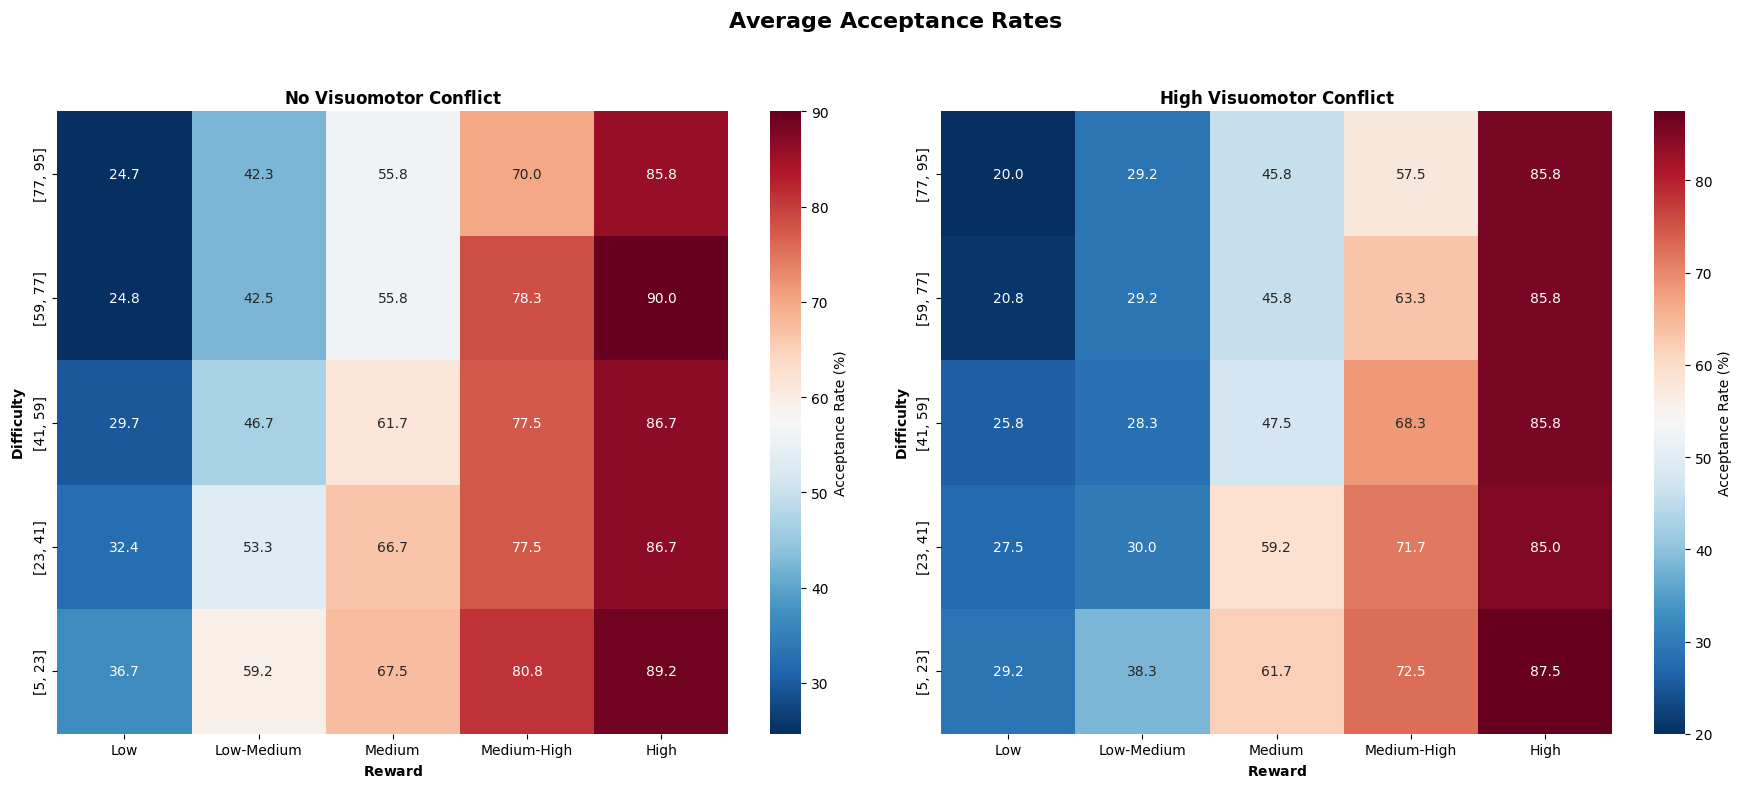

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

# Directory where JSON files are stored
folder_path = r'C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data'

# Reward categories
REWARD_CATEGORIES = {
    "Low": (0.5, 1.5),
    "Low-Medium": (4.5, 5.5),
    "Medium": (9.5, 10.5),
    "Medium-High": (19.5, 20.5),
    "High": (39.5, 40.5),
}

def categorize_reward(reward):
    """Categorize reward values based on predefined ranges."""
    for category, (low, high) in REWARD_CATEGORIES.items():
        if low <= reward <= high:
            return category
    return 'Other'

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Data folder does not exist.")
    exit()

print(f"Accessing data folder: {folder_path}")

# Initialize combined data dictionary for averaging across participants
combined_data = {'[0, 0]': [], '[0, 1000]': []}

# Process each JSON file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        print(f"Processing file: {filename}")
        json_path = os.path.join(folder_path, filename)

        with open(json_path, "r", encoding="utf-8") as json_file:
            data = json.load(json_file)
            df = pd.DataFrame(data)

            # Filter only 'accept' trials
            df_accept = df[df['task'] == 'accept'].copy()
            df_accept['delay'] = df_accept['delay'].astype(str)  # Ensure delay is a string

            # Process each unique delay
            for delay in df_accept['delay'].unique():
                df_delay = df_accept[df_accept['delay'] == delay].copy()

                # Use 'originalBounds' directly
                df_delay['bounds_group'] = df_delay['originalBounds'].astype(str)

                # Categorize rewards
                df_delay['reward_group'] = df_delay['reward'].apply(categorize_reward)

                # Filter only accepted trials
                df_accepted = df_delay[df_delay['response'] == 'ArrowRight']

                # Group trials
                total_trials = df_delay.groupby(['reward_group', 'bounds_group']).size().reset_index(name='total')
                accepted_trials = df_accepted.groupby(['reward_group', 'bounds_group']).size().reset_index(name='accepted')

                # Calculate acceptance rates for this delay
                acceptance_rate = pd.merge(total_trials, accepted_trials, on=['reward_group', 'bounds_group'], how='left')
                acceptance_rate['accepted'] = acceptance_rate['accepted'].fillna(0)
                acceptance_rate['acceptance_rate'] = (acceptance_rate['accepted'] / acceptance_rate['total']) * 100

                # Collect acceptance rates for each delay condition
                if delay in combined_data:
                    combined_data[delay].append(acceptance_rate)

# Now we average the acceptance rates for each delay condition
average_heatmaps = {'[0, 0]': None, '[0, 1000]': None}

# Generate average heatmaps by taking the mean of all collected acceptance rates
for delay in combined_data:
    if len(combined_data[delay]) > 0:
        # Concatenate all collected data for the delay condition
        combined_df = pd.concat(combined_data[delay])

        # Sort 'reward_group' and 'bounds_group' to ensure consistency in the heatmap
        reward_order = ["Low", "Low-Medium", "Medium", "Medium-High", "High"]
        bounds_order = ["[77, 95]", "[59, 77]", "[41, 59]", "[23, 41]", "[5, 23]"]
        
        # Set categorical order for sorting
        combined_df['reward_group'] = pd.Categorical(combined_df['reward_group'], categories=reward_order, ordered=True)
        combined_df['bounds_group'] = pd.Categorical(combined_df['bounds_group'], categories=bounds_order, ordered=True)

        # Group by reward_group and bounds_group, calculate the mean acceptance rate
        average_heatmap = combined_df.groupby(['reward_group', 'bounds_group'])['acceptance_rate'].mean().reset_index()

        # Pivot the data to get a heatmap-friendly format
        average_heatmaps[delay] = average_heatmap.pivot(index='bounds_group', columns='reward_group', values='acceptance_rate').fillna(0)

# Plotting the average heatmaps for each delay condition
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Titles for the heatmaps
plot_titles = {
    '[0, 0]': r"$\bf{No\ Visuomotor\ Conflict}$",
    '[0, 1000]': r"$\bf{High\ Visuomotor\ Conflict}$",
}

cmap = 'RdBu_r'

# Define categories for sorting (these should be consistent across all plots)
reward_order = ["Low", "Low-Medium", "Medium", "Medium-High", "High"]
bounds_order = ["[77, 95]", "[59, 77]", "[41, 59]", "[23, 41]", "[5, 23]"]

# Generate and plot the average heatmaps
for i, delay in enumerate(['[0, 0]', '[0, 1000]']):
    if average_heatmaps[delay] is not None:
        heatmap_data = average_heatmaps[delay]
        
        # Adjust color range dynamically
        vmin, vmax = heatmap_data.min().min(), heatmap_data.max().max()

        sns.heatmap(
            heatmap_data, annot=True, cmap=cmap, 
            cbar_kws={'label': 'Acceptance Rate (%)'}, ax=axes[i], 
            vmin=vmin, vmax=vmax, fmt=".1f"
        )
        axes[i].set_title(plot_titles[delay])
        axes[i].set_xlabel(r"$\bf{Reward}$")
        axes[i].set_ylabel(r"$\bf{Difficulty}$")

plt.suptitle(r"$\bf{Average\ Acceptance\ Rates}$", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Acceptance rate Per Participant

Accessing data folder: C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data
Found file: numerosity_5adef850eb60400001539109_2025-03-05T19_54_21.326Z_20250306_09.03.json
['[0, 0]' '[0, 1000]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12       4.0        33.333333
1          High     [41, 59]     12       4.0        33.333333
2          High      [5, 23]     12       4.0        33.333333
3          High     [59, 77]     12       4.0        33.333333
4          High     [77, 95]     12       3.0        25.000000
5           Low     [23, 41]     12       0.0         0.000000
6           Low     [41, 59]     12       0.0         0.000000
7           Low      [5, 23]     12       0.0         0.000000
8           Low     [59, 77]     12       0.0         0.000000
9           Low     [77, 95]     12       0.0         0.000000
10   Low-Medium     [23, 41]     12       1.0         8.333333
11   Low-Med

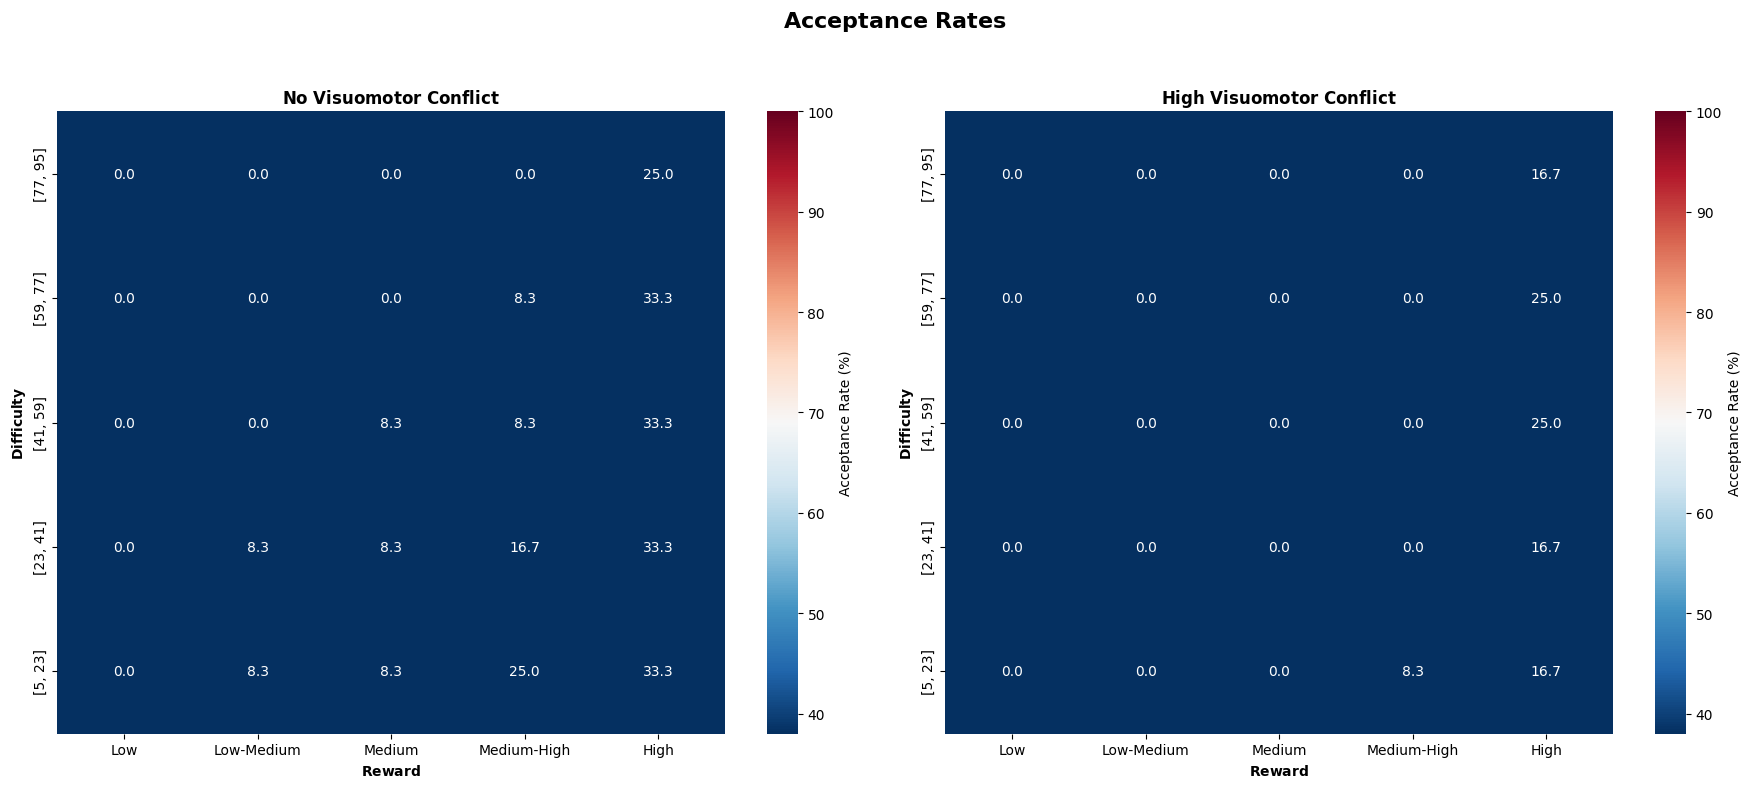

Found file: numerosity_5d7472ad3bc4020015f3bb56_2025-03-06T19_12_57.668Z_20250317_14.02.json
['[0, 0]' '[0, 1000]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12      12.0       100.000000
1          High     [41, 59]     12      12.0       100.000000
2          High      [5, 23]     12      12.0       100.000000
3          High     [59, 77]     12      12.0       100.000000
4          High     [77, 95]     12      12.0       100.000000
5           Low     [23, 41]     12       0.0         0.000000
6           Low     [41, 59]     12       0.0         0.000000
7           Low      [5, 23]     12       0.0         0.000000
8           Low     [59, 77]     12       0.0         0.000000
9           Low     [77, 95]     12       0.0         0.000000
10   Low-Medium     [23, 41]     12      10.0        83.333333
11   Low-Medium     [41, 59]     12       8.0        66.666667
12   Low-Medium      [5, 23]     12      10.0        83.333333
13

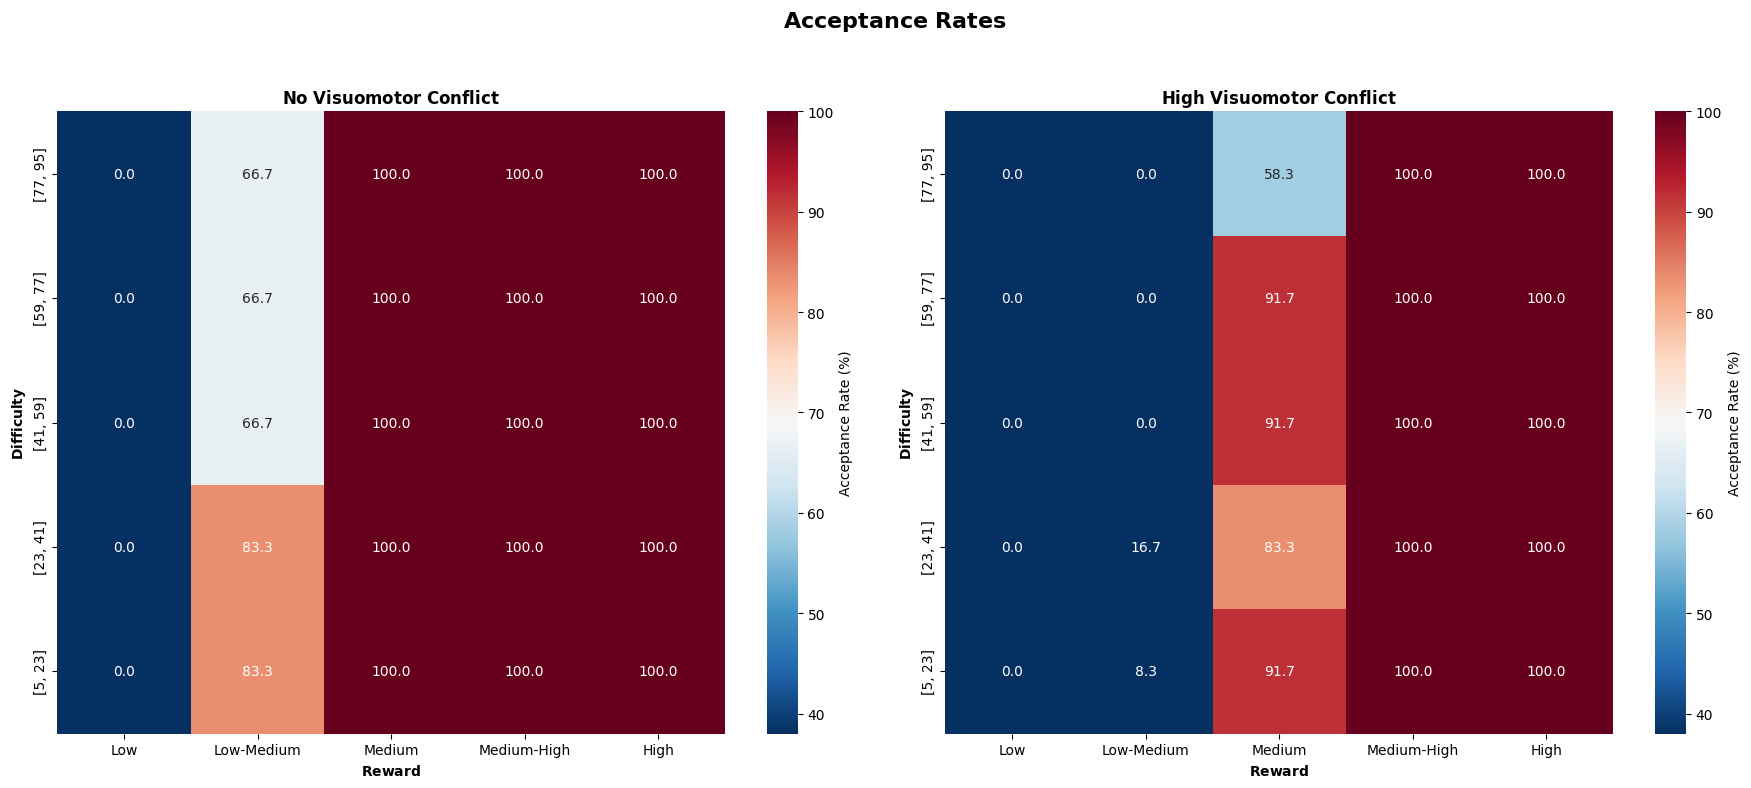

Found file: numerosity_63cff262503b56190be3eb18_2025-03-06T21_13_32.192Z_20250317_14.02.json
['[0, 0]' '[0, 1000]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12       6.0        50.000000
1          High     [41, 59]     12       6.0        50.000000
2          High      [5, 23]     12       7.0        58.333333
3          High     [59, 77]     12      10.0        83.333333
4          High     [77, 95]     12       5.0        41.666667
5           Low     [23, 41]     12       0.0         0.000000
6           Low     [41, 59]     12       0.0         0.000000
7           Low      [5, 23]     12       1.0         8.333333
8           Low     [59, 77]     12       0.0         0.000000
9           Low     [77, 95]     12       0.0         0.000000
10   Low-Medium     [23, 41]     12       1.0         8.333333
11   Low-Medium     [41, 59]     12       1.0         8.333333
12   Low-Medium      [5, 23]     12       1.0         8.333333
13

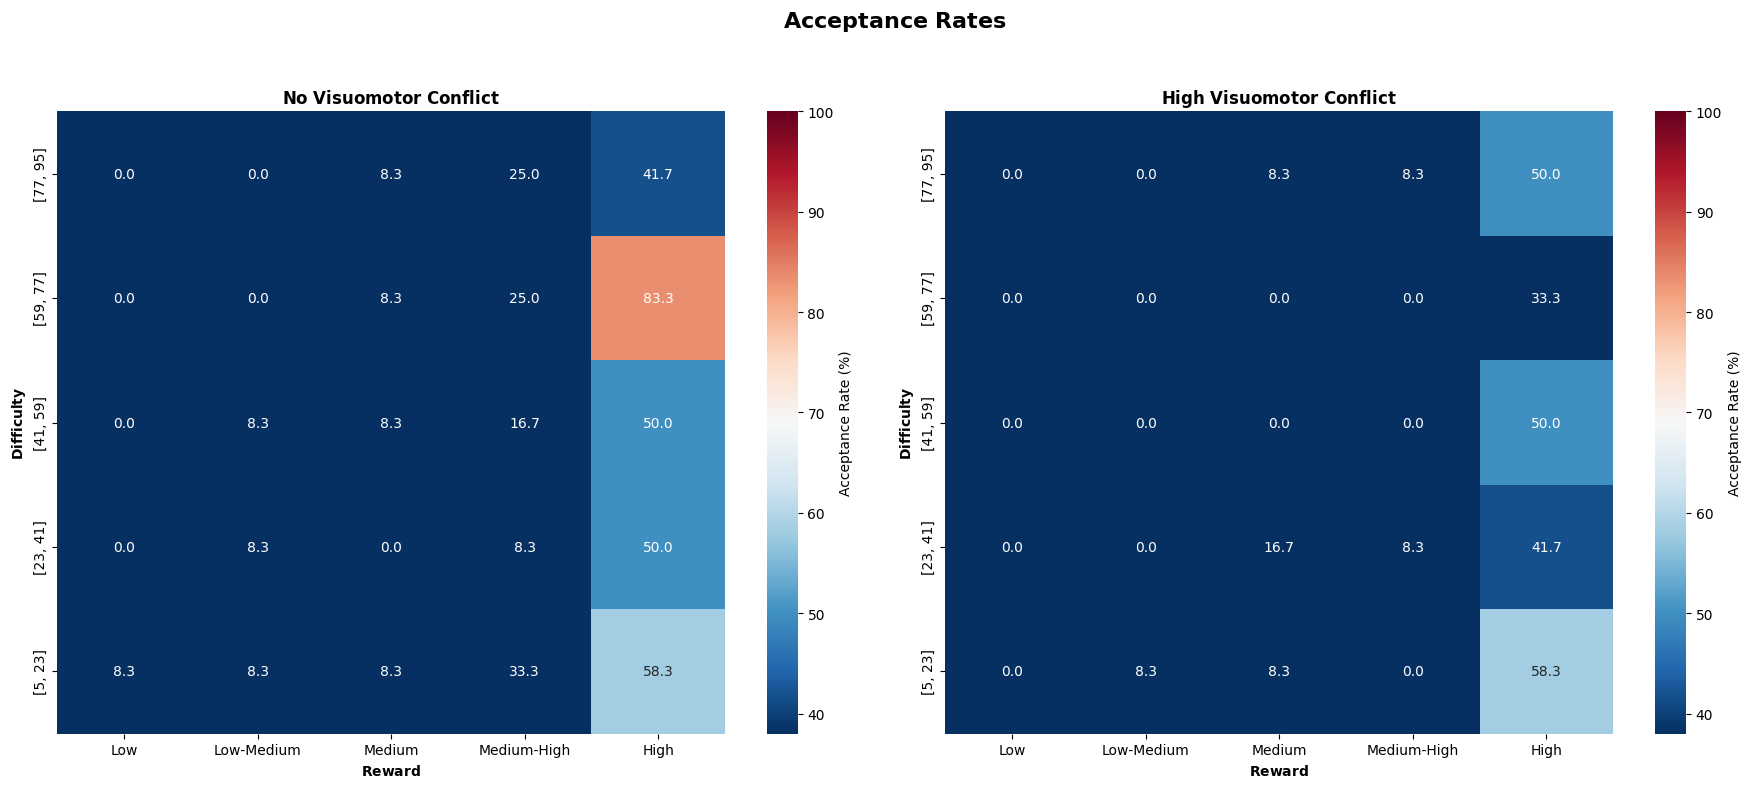

Found file: numerosity_6562025a6e3331528cf8fb3d_2025-03-06T20_47_39.480Z_20250317_14.02.json
['[0, 1000]' '[0, 0]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12        12            100.0
1          High     [41, 59]     12        12            100.0
2          High      [5, 23]     12        12            100.0
3          High     [59, 77]     12        12            100.0
4          High     [77, 95]     12        12            100.0
5           Low     [23, 41]     12        12            100.0
6           Low     [41, 59]     12        12            100.0
7           Low      [5, 23]     12        12            100.0
8           Low     [59, 77]     12        12            100.0
9           Low     [77, 95]     12        12            100.0
10   Low-Medium     [23, 41]     12        12            100.0
11   Low-Medium     [41, 59]     12        12            100.0
12   Low-Medium      [5, 23]     12        12            100.0
13

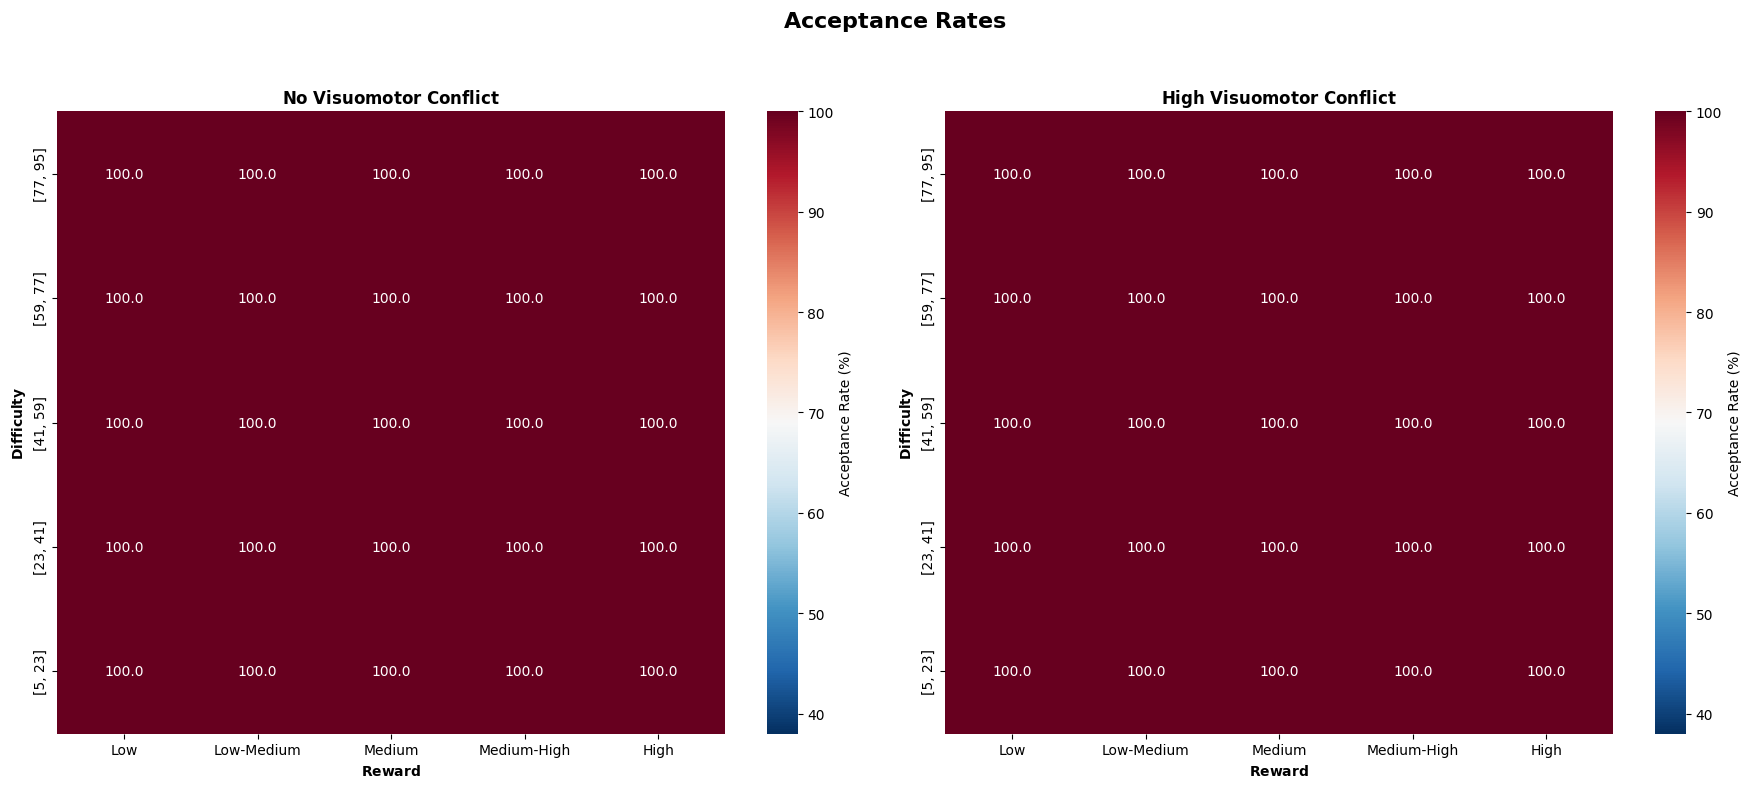

Found file: numerosity_6612c945cebe319d923b80f8_2025-03-06T19_41_39.464Z_20250317_14.02.json
['[0, 0]' '[0, 1000]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12      12.0       100.000000
1          High     [41, 59]     12      12.0       100.000000
2          High      [5, 23]     12      12.0       100.000000
3          High     [59, 77]     12      12.0       100.000000
4          High     [77, 95]     12      12.0       100.000000
5           Low     [23, 41]     12       0.0         0.000000
6           Low     [41, 59]     12       0.0         0.000000
7           Low      [5, 23]     12       1.0         8.333333
8           Low     [59, 77]     12       0.0         0.000000
9           Low     [77, 95]     12       0.0         0.000000
10   Low-Medium     [23, 41]     12       5.0        41.666667
11   Low-Medium     [41, 59]     12       2.0        16.666667
12   Low-Medium      [5, 23]     12      10.0        83.333333
13

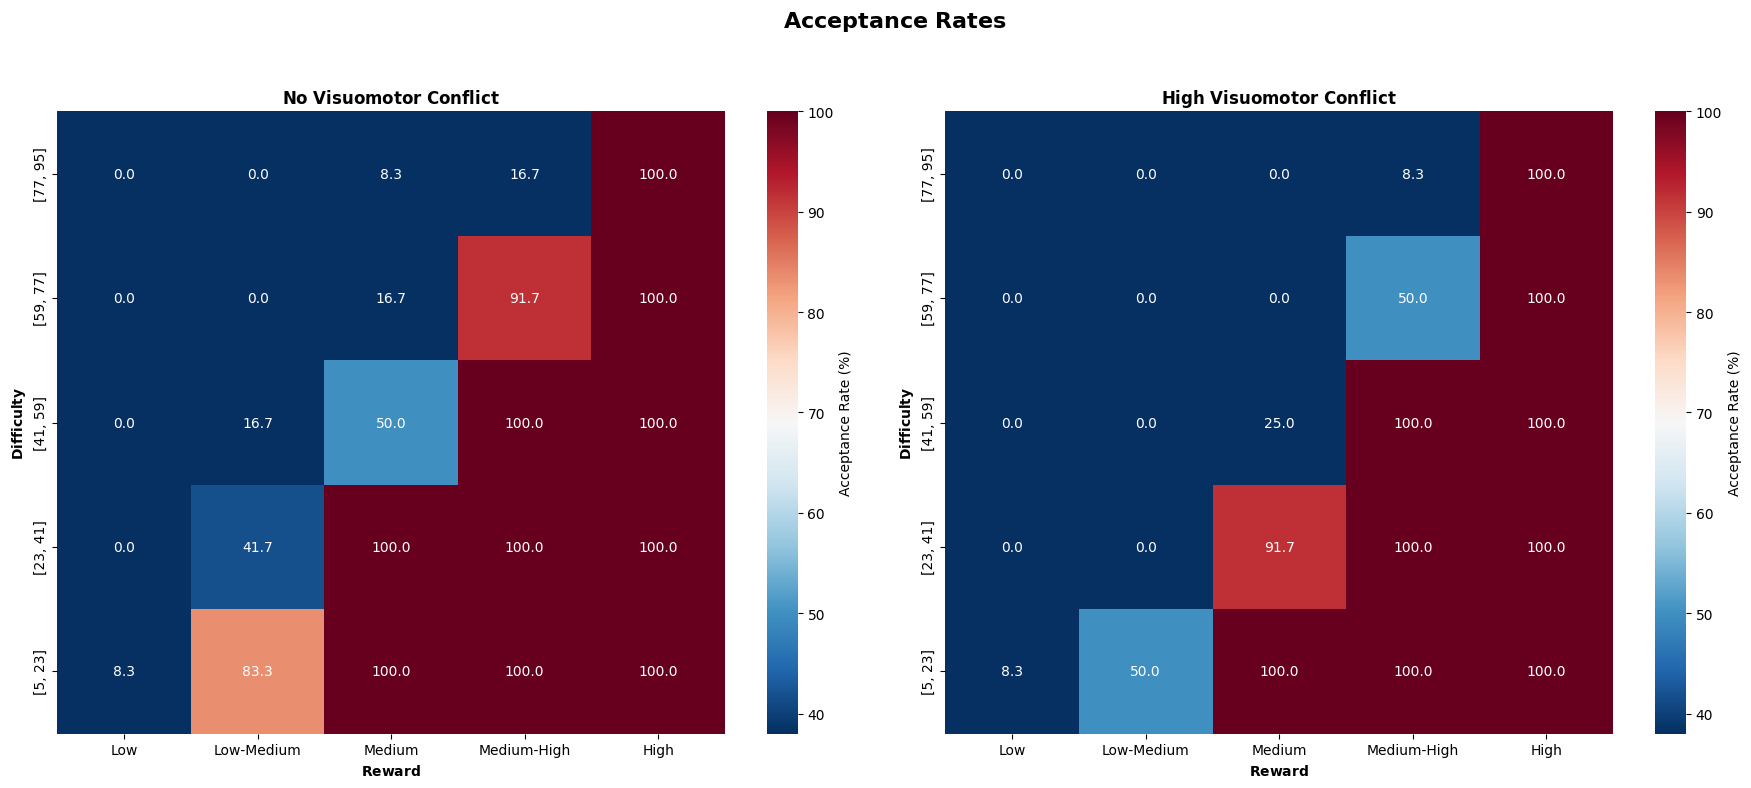

Found file: numerosity_66b5a7ae36e5b931db863954_2025-03-05T19_14_11.010Z_20250306_09.03.json
['[0, 1000]' '[0, 0]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12      12.0       100.000000
1          High     [41, 59]     12      12.0       100.000000
2          High      [5, 23]     12      12.0       100.000000
3          High     [59, 77]     12      12.0       100.000000
4          High     [77, 95]     12      12.0       100.000000
5           Low     [23, 41]     12       0.0         0.000000
6           Low     [41, 59]     12       0.0         0.000000
7           Low      [5, 23]     12       0.0         0.000000
8           Low     [59, 77]     12       0.0         0.000000
9           Low     [77, 95]     12       0.0         0.000000
10   Low-Medium     [23, 41]     12       0.0         0.000000
11   Low-Medium     [41, 59]     12       0.0         0.000000
12   Low-Medium      [5, 23]     12       0.0         0.000000
13

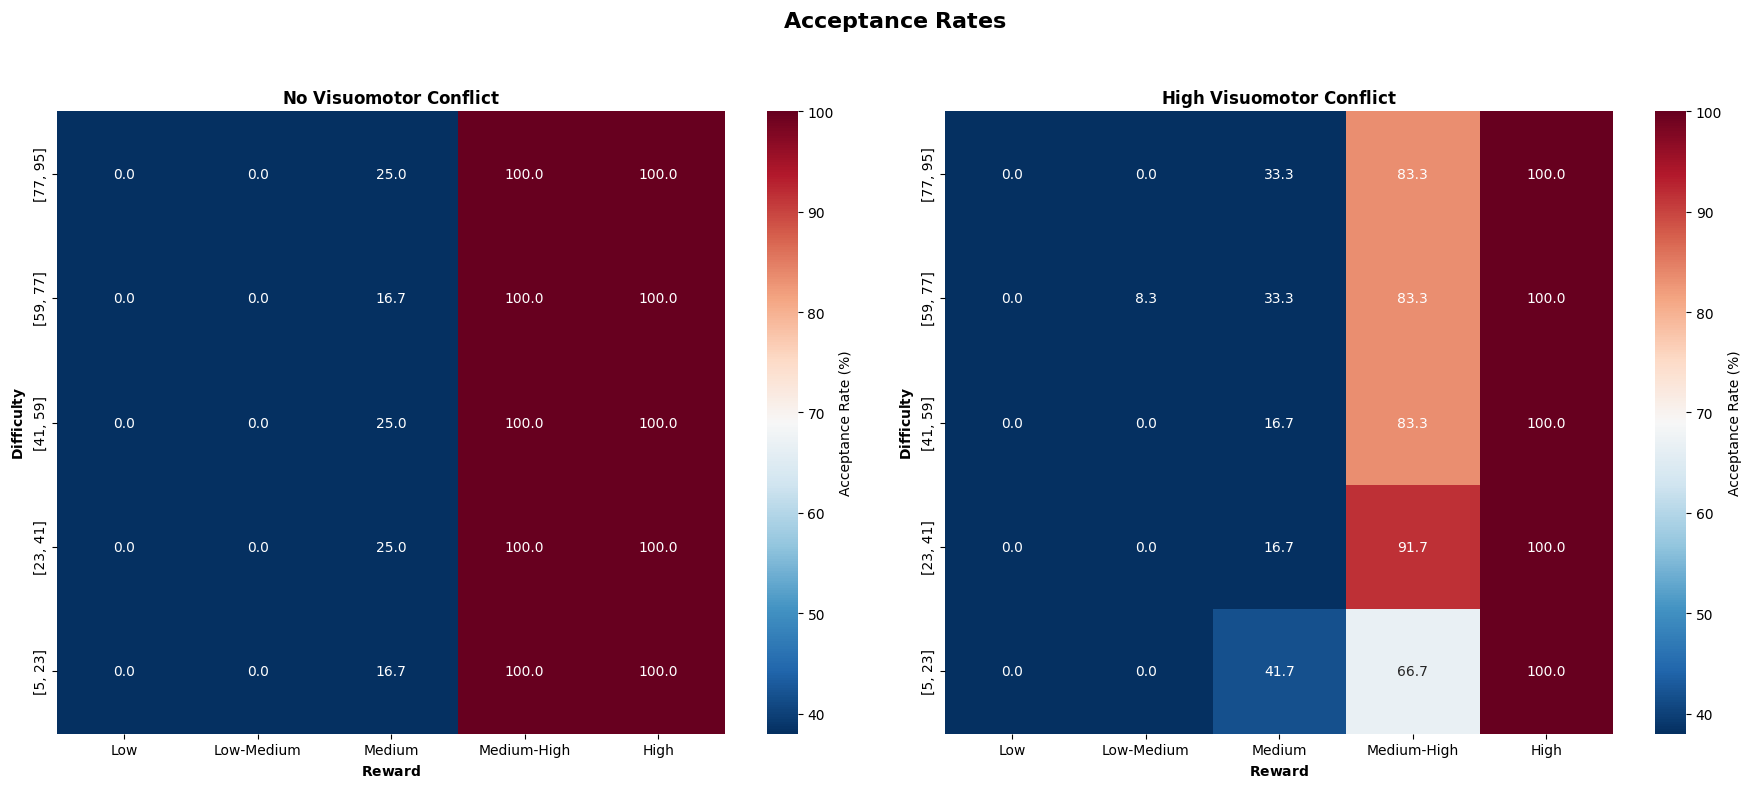

Found file: numerosity_6773fc8590d7b54b0d580e6b_2025-03-06T21_43_44.383Z_20250317_14.02.json
['[0, 1000]' '[0, 0]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     10        10       100.000000
1          High     [41, 59]     10        10       100.000000
2          High      [5, 23]     11        11       100.000000
3          High     [59, 77]     10        10       100.000000
4          High     [77, 95]     11        11       100.000000
5           Low     [23, 41]     11        10        90.909091
6           Low     [41, 59]     10         8        80.000000
7           Low      [5, 23]     10        10       100.000000
8           Low     [59, 77]     10         4        40.000000
9           Low     [77, 95]     10         3        30.000000
10   Low-Medium     [23, 41]     10        10       100.000000
11   Low-Medium     [41, 59]     10        10       100.000000
12   Low-Medium      [5, 23]     10        10       100.000000
13

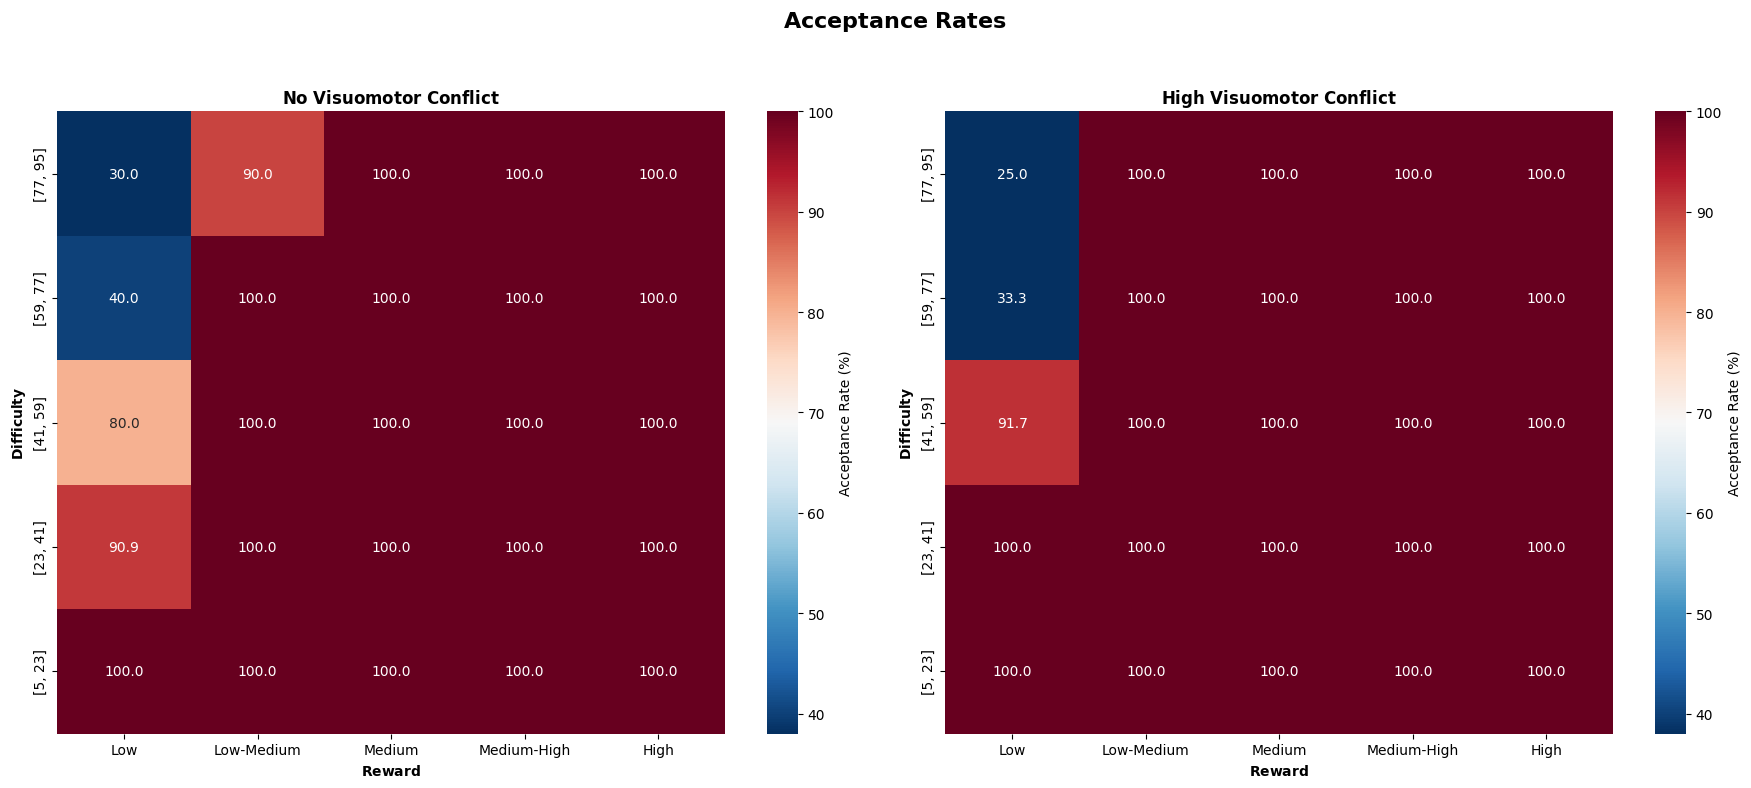

Found file: numerosity_6785b7dd6705050739feb0ad_2025-03-05T19_38_14.876Z_20250306_09.03.json
['[0, 0]' '[0, 1000]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12      12.0       100.000000
1          High     [41, 59]     12      12.0       100.000000
2          High      [5, 23]     12      12.0       100.000000
3          High     [59, 77]     12      12.0       100.000000
4          High     [77, 95]     12      12.0       100.000000
5           Low     [23, 41]     12       3.0        25.000000
6           Low     [41, 59]     12       1.0         8.333333
7           Low      [5, 23]     12       3.0        25.000000
8           Low     [59, 77]     12       0.0         0.000000
9           Low     [77, 95]     12       1.0         8.333333
10   Low-Medium     [23, 41]     12       8.0        66.666667
11   Low-Medium     [41, 59]     12       7.0        58.333333
12   Low-Medium      [5, 23]     12       9.0        75.000000
13

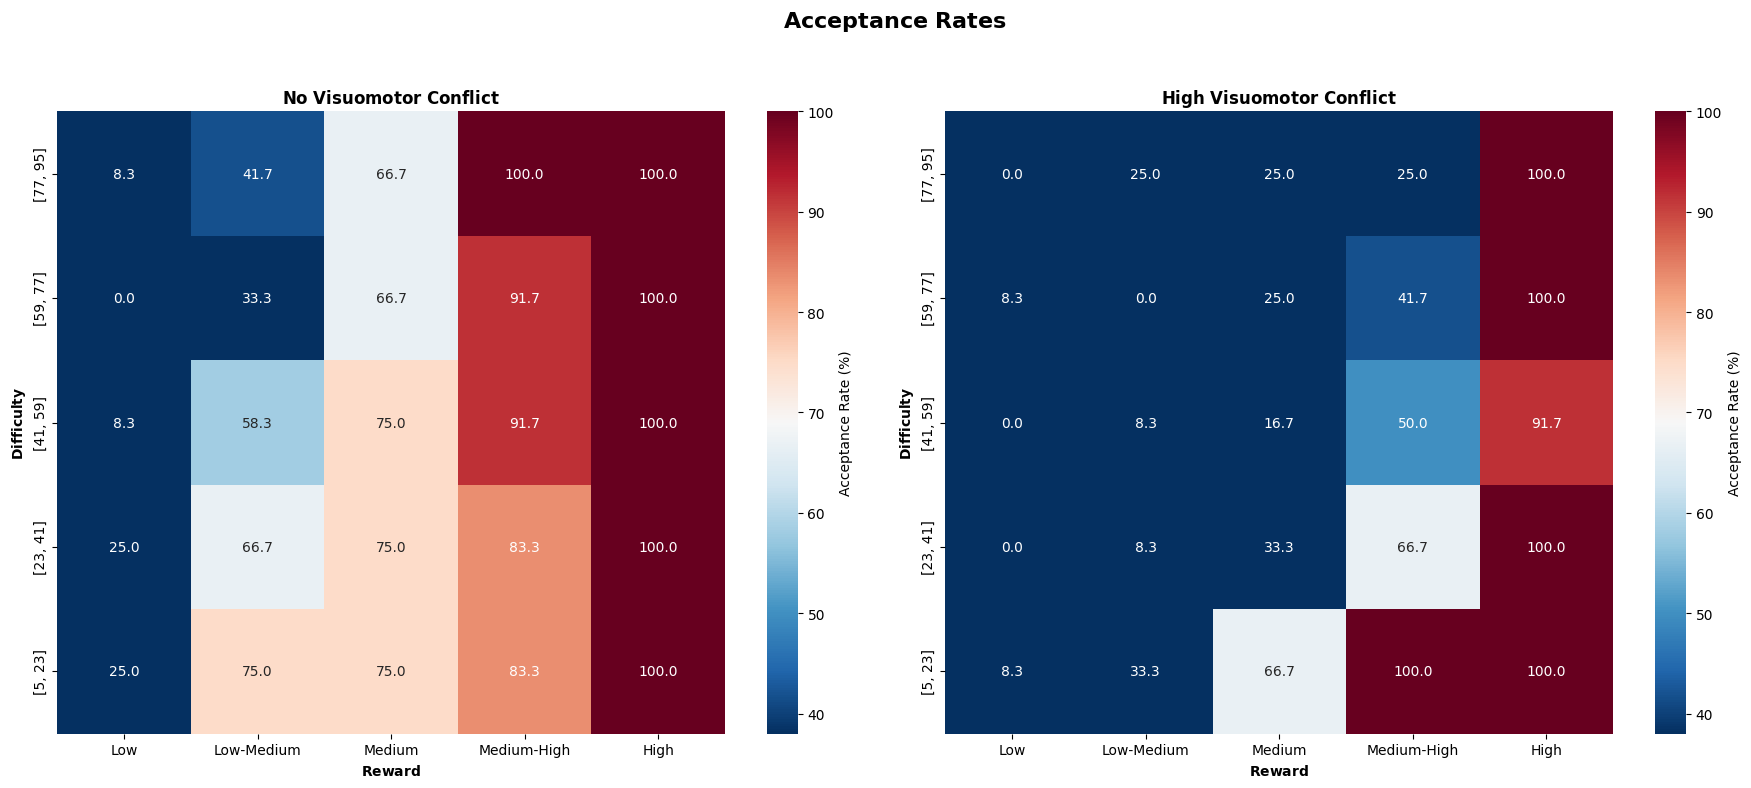

Found file: numerosity_678fa07cd72c816bac76bda5_2025-03-05T19_24_37.980Z_20250306_09.03.json
['[0, 1000]' '[0, 0]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12        12       100.000000
1          High     [41, 59]     12        11        91.666667
2          High      [5, 23]     12        12       100.000000
3          High     [59, 77]     12        12       100.000000
4          High     [77, 95]     12        11        91.666667
5           Low     [23, 41]     12         6        50.000000
6           Low     [41, 59]     12         6        50.000000
7           Low      [5, 23]     12         6        50.000000
8           Low     [59, 77]     12         6        50.000000
9           Low     [77, 95]     12         6        50.000000
10   Low-Medium     [23, 41]     12         6        50.000000
11   Low-Medium     [41, 59]     12         6        50.000000
12   Low-Medium      [5, 23]     12         6        50.000000
13

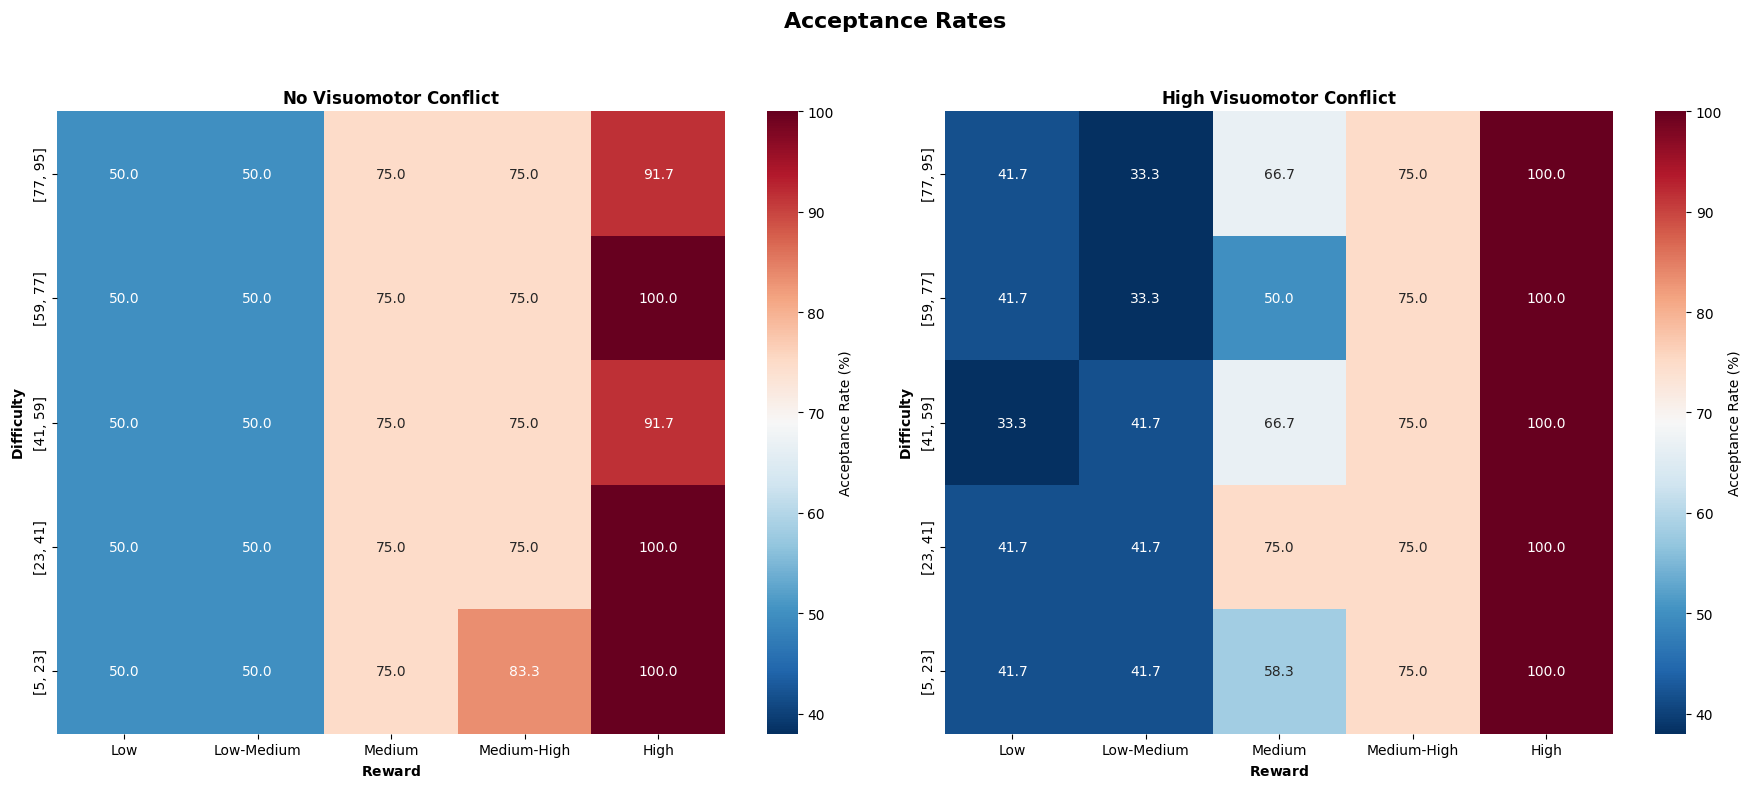

Found file: numerosity_67ac2151e5b37e0b91a5af0e_2025-03-05T19_09_18.774Z_20250306_09.03.json
['[0, 1000]' '[0, 0]']
   reward_group bounds_group  total  accepted  acceptance_rate
0          High     [23, 41]     12        10        83.333333
1          High     [41, 59]     12        11        91.666667
2          High      [5, 23]     12        12       100.000000
3          High     [59, 77]     12        10        83.333333
4          High     [77, 95]     12        12       100.000000
5           Low     [23, 41]     12         7        58.333333
6           Low     [41, 59]     12         7        58.333333
7           Low      [5, 23]     12         9        75.000000
8           Low     [59, 77]     12         7        58.333333
9           Low     [77, 95]     12         7        58.333333
10   Low-Medium     [23, 41]     12         9        75.000000
11   Low-Medium     [41, 59]     12         8        66.666667
12   Low-Medium      [5, 23]     12        10        83.333333
13

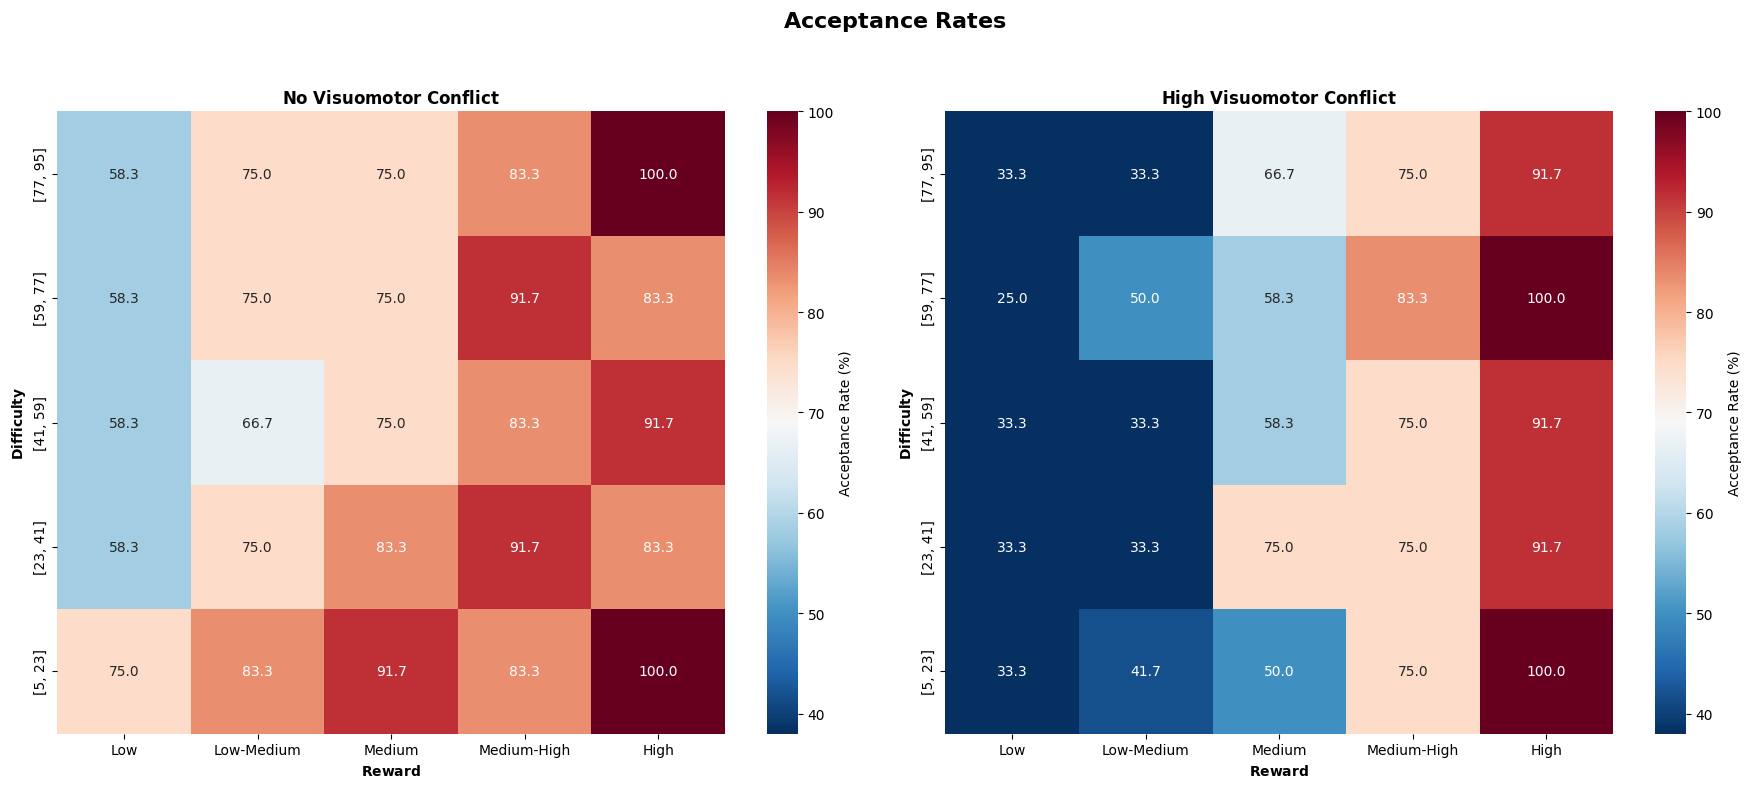

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

# Directory where json files are stored
folder_path = r'C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data'

# Reward categories
LOW_REWARDS = [0.5, 1.5]
LOW_MEDIUM_REWARDS = [4.5, 5.5]
MEDIUM_REWARDS = [9.5, 10.5]
MEDIUM_HIGH_REWARDS = [19.5, 20.5]
HIGH_REWARDS = [39.5, 40.5]

def categorize_reward(reward):
    if LOW_REWARDS[0] <= reward <= LOW_REWARDS[1]:
        return 'Low'
    elif LOW_MEDIUM_REWARDS[0] <= reward <= LOW_MEDIUM_REWARDS[1]:
        return 'Low-Medium'
    elif MEDIUM_REWARDS[0] <= reward <= MEDIUM_REWARDS[1]:
        return 'Medium'
    elif MEDIUM_HIGH_REWARDS[0] <= reward <= MEDIUM_HIGH_REWARDS[1]:
        return 'Medium-High'
    elif HIGH_REWARDS[0] <= reward <= HIGH_REWARDS[1]:
        return 'High'
    else:
        return 'Other'


# Check if the data folder exists
if not os.path.exists(folder_path):
    print("Data folder does not exist.")
else:
    print(f"Accessing data folder: {folder_path}")

# Loop through all files in the data folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        print(f"Found file: {filename}")
        json_path = os.path.join(folder_path, filename)
        
        # Dictionary to hold combined data for each delay
        combined_data = {}
        
        with open(json_path, "r", encoding="utf-8") as json_file:
                data = json.load(json_file)
                # Convert JSON data into a DataFrame 
                df = pd.DataFrame(data)
                
                # Step 1: Filter for task = 'accept' - only processing these trials
                df_accept = df[df['task'] == 'accept'].copy()

                # Step 2: Group by unique delay values
                df_accept['delay'] = df_accept['delay'].apply(lambda x: str(x) if isinstance(x, list) else x)
                unique_delays = df_accept['delay'].unique()
                print(unique_delays)
                for delay in unique_delays:
                    # Step 3: Process each delay group independently
                    df_delay = df_accept[df_accept['delay'] == delay].copy()

                    # Directly use 'originalBounds' without converting to strings
                    df_delay['bounds_group'] = df_delay['originalBounds']
                    df_delay['bounds_group'] = df_delay['bounds_group'].apply(lambda x: str(x) if isinstance(x, list) else x)

                    # Categorize rewards based on values in the 'reward' column
                    df_delay['reward_group'] = df_delay['reward'].apply(categorize_reward)

                    # Filter directly for accepted trials (response == 'ArrowRight')
                    df_accepted = df_delay[df_delay['response'] == 'ArrowRight']

                    # Calculate total trials and accepted trials by reward and bounds group
                    total_trials = df_delay.groupby(['reward_group', 'bounds_group']).size().reset_index(name='total')
                    accepted_trials = df_accepted.groupby(['reward_group', 'bounds_group']).size().reset_index(name='accepted')

                    # Initialize or update the combined data for this delay
                    if delay not in combined_data:
                        combined_data[delay] = {'total': total_trials, 'accepted': accepted_trials}
                    else:
                        # Merge and sum the data with existing data for this delay
                        combined_data[delay]['total'] = combined_data[delay]['total'].merge(total_trials, on=['reward_group', 'bounds_group'], how='outer', suffixes=('', '_file'))
                        combined_data[delay]['accepted'] = combined_data[delay]['accepted'].merge(accepted_trials, on=['reward_group', 'bounds_group'], how='outer', suffixes=('', '_file'))

                        combined_data[delay]['total']['total'] = combined_data[delay]['total'][['total', 'total_file']].sum(axis=1)
                        combined_data[delay]['accepted']['accepted'] = combined_data[delay]['accepted'][['accepted', 'accepted_file']].sum(axis=1)

                        combined_data[delay]['total'].drop(columns=['total_file'], inplace=True)
                        combined_data[delay]['accepted'].drop(columns=['accepted_file'], inplace=True)

        # Create a grid of subplots
        fig, axes = plt.subplots(1, 2, figsize=(18, 8))

        # Titles corresponding to delays
        plot_titles = {
            '[0, 0]': r"$\bf{No\ Visuomotor\ Conflict}$",
            '[0, 1000]': r"$\bf{High\ Visuomotor\ Conflict}$",
        }

        # Define color map and fixed color range for all heatmaps
        cmap = 'RdBu_r'
        vmin, vmax = 38, 100  # Fixed range for percentage acceptance rates

        # Iterate over the specified delays in the desired order
        for i, delay in enumerate(['[0, 0]','[0, 1000]']):
            if delay in combined_data:
                data = combined_data[delay]
                # Merge to calculate acceptance rate
                acceptance_rate = pd.merge(data['total'], data['accepted'], on=['reward_group', 'bounds_group'], how='left')
                acceptance_rate['accepted'] = acceptance_rate['accepted'].fillna(0)
                acceptance_rate['acceptance_rate'] = (acceptance_rate['accepted'] / acceptance_rate['total']) * 100  # Convert to percentage

                # Set categorical order for heatmap
                reward_order = ['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High']
                bounds_order = ['[77, 95]', '[59, 77]', '[41, 59]', '[23, 41]', '[5, 23]']
                acceptance_rate['reward_group'] = pd.Categorical(acceptance_rate['reward_group'], categories=reward_order, ordered=True)
                acceptance_rate['bounds_group'] = pd.Categorical(acceptance_rate['bounds_group'], categories=bounds_order, ordered=True)

                # Generate the heatmap for this delay
                print(acceptance_rate)
                heatmap_data = acceptance_rate.pivot(index='bounds_group', columns='reward_group', values='acceptance_rate')

                if not heatmap_data.empty and heatmap_data.notna().any().any():
                    sns.heatmap(
                        heatmap_data, 
                        annot=True, 
                        cmap=cmap, 
                        cbar_kws={'label': 'Acceptance Rate (%)'}, 
                        ax=axes[i], 
                        vmin=vmin, 
                        vmax=vmax, 
                        fmt=".1f"  # Format numbers with one decimal place
                    )
                    axes[i].set_title(plot_titles[delay])
                    axes[i].set_xlabel(r"$\bf{Reward}$")
                    axes[i].set_ylabel(r"$\bf{Difficulty}$")
                else:
                    print(f"No valid data to plot for delay: {delay} in combined data.")

        # Set the super title for the whole figure
        plt.suptitle(r"$\bf{Acceptance\ Rates}$", fontsize=16)

        # Adjust layout to prevent overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # The rect parameter adjusts the space for the super title

        # Show the combined plot
        plt.show()

        # Update bounds mapping to corresponding labels
        bounds_mapping = {
         '[5, 23]': 'Low',
         '[23, 41]': 'LowMedium',
         '[41, 59]': 'Medium',
         '[59, 77]': 'MediumHigh',
         '[77, 95]': 'High',
        }

        # Replace the numeric bounds with the corresponding labels in your combined data
        for delay in combined_data.keys():
            combined_data[delay]['total']['bounds_group'] = combined_data[delay]['total']['bounds_group'].map(bounds_mapping)
            combined_data[delay]['accepted']['bounds_group'] = combined_data[delay]['accepted']['bounds_group'].map(bounds_mapping)

        # Function to compare and print all differences between two acceptance rate heatmaps
        def compare_and_print_all_differences(rate_map1, rate_map2, delay1, delay2):
            # Calculate the absolute differences between the two acceptance rate heatmaps
            difference = rate_map1.subtract(rate_map2).abs()
            
            # Print all differences
            print(f"Comparing acceptance rate differences between {delay1} and {delay2}:")
            for idx in difference.stack().index:
                reward_group, bounds_group = idx
                diff_value = difference.at[bounds_group, reward_group]
                print(f"Reward: {reward_group}, Difficulty: {bounds_group} - Difference: {diff_value:.4f}")
            print()

        # Generate the acceptance rate heatmaps for each delay using labels
        heatmap_low = combined_data['[0, 1000]']['total'].merge(
            combined_data['[0, 1000]']['accepted'], on=['reward_group', 'bounds_group'], suffixes=('_total', '_accepted')
        )
        heatmap_low['acceptance_rate'] = (heatmap_low['accepted'] / heatmap_low['total'])*100
        heatmap_low = heatmap_low.pivot(index='bounds_group', columns='reward_group', values='acceptance_rate')

        heatmap_high = combined_data['[0, 0]']['total'].merge(
            combined_data['[0, 0]']['accepted'], on=['reward_group', 'bounds_group'], suffixes=('_total', '_accepted')
        )
        heatmap_high['acceptance_rate'] = (heatmap_high['accepted'] / heatmap_high['total'])*100
        heatmap_high = heatmap_high.pivot(index='bounds_group', columns='reward_group', values='acceptance_rate')

        # Compare Low vs High
        #compare_and_print_all_differences(heatmap_low, heatmap_high, 'Low Agency', 'High Agency')






# Reaction Times

In [53]:
import os
import pandas as pd
import json

folder_path = r'C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data'

# Iterate over each JSON file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Check if the data is a list (common in JSONL or list-based JSON files)
            if isinstance(data, list):
                trials = data
            # Check if the data is a dictionary containing a 'trials' key
            elif isinstance(data, dict) and 'trials' in data:
                trials = data['trials']
            else:
                # Skip files that don't match expected structure
                continue
            
            # Convert trials to a DataFrame
            df = pd.DataFrame(trials)
            
            # Ensure 'rt' column exists
            if 'rt' in df.columns:
                # Convert 'rt' to numeric, coercing errors to NaN
                df['rt'] = pd.to_numeric(df['rt'], errors='coerce')
                
                # Retrieve the top 5 reaction times
                top_5_rts = df['rt'].nlargest(5)
                print(f"Top 5 RTs in {filename}:")
                print(top_5_rts)
            else:
                print(f"No 'rt' column found in {filename}.")


Top 5 RTs in numerosity_5adef850eb60400001539109_2025-03-05T19_54_21.326Z_20250306_09.03.json:
160     253392.0
483     168002.0
1294     82999.0
118      66068.0
84       57364.0
Name: rt, dtype: float64


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7884: character maps to <undefined>

# Acceptance Rates Per Participant Over Time

Accessing data folder: C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data
Processing file: numerosity_5adef850eb60400001539109_2025-03-05T19_54_21.326Z_20250306_09.03.json


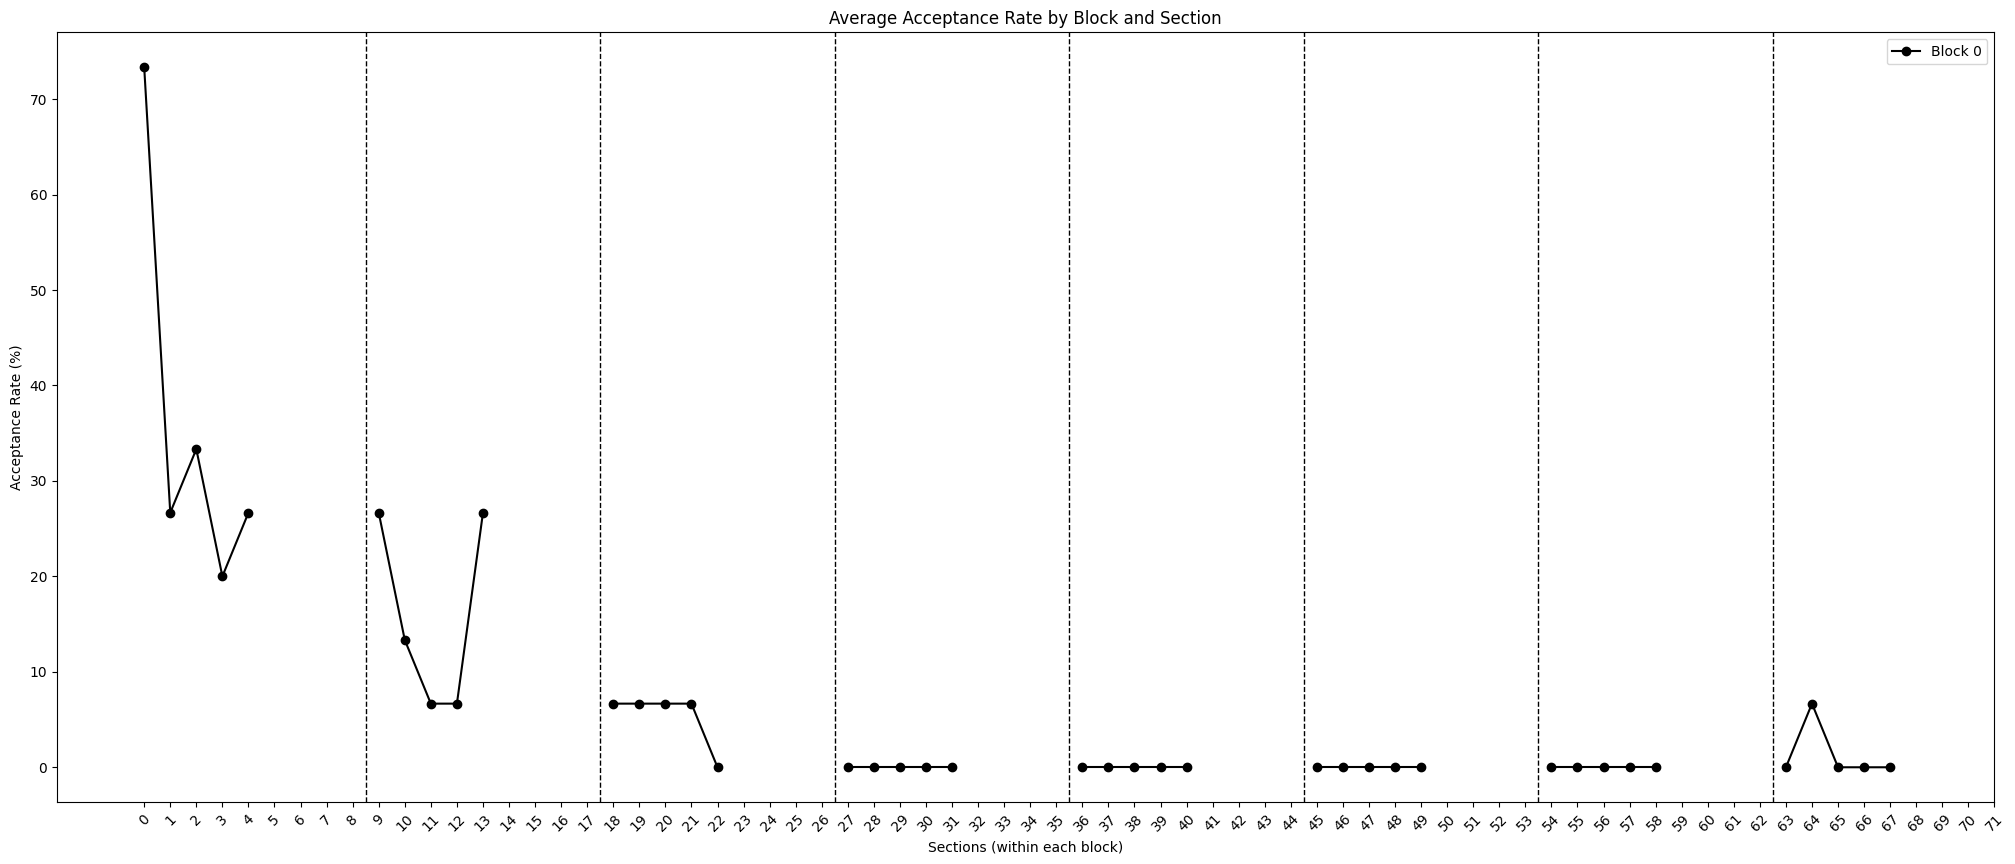

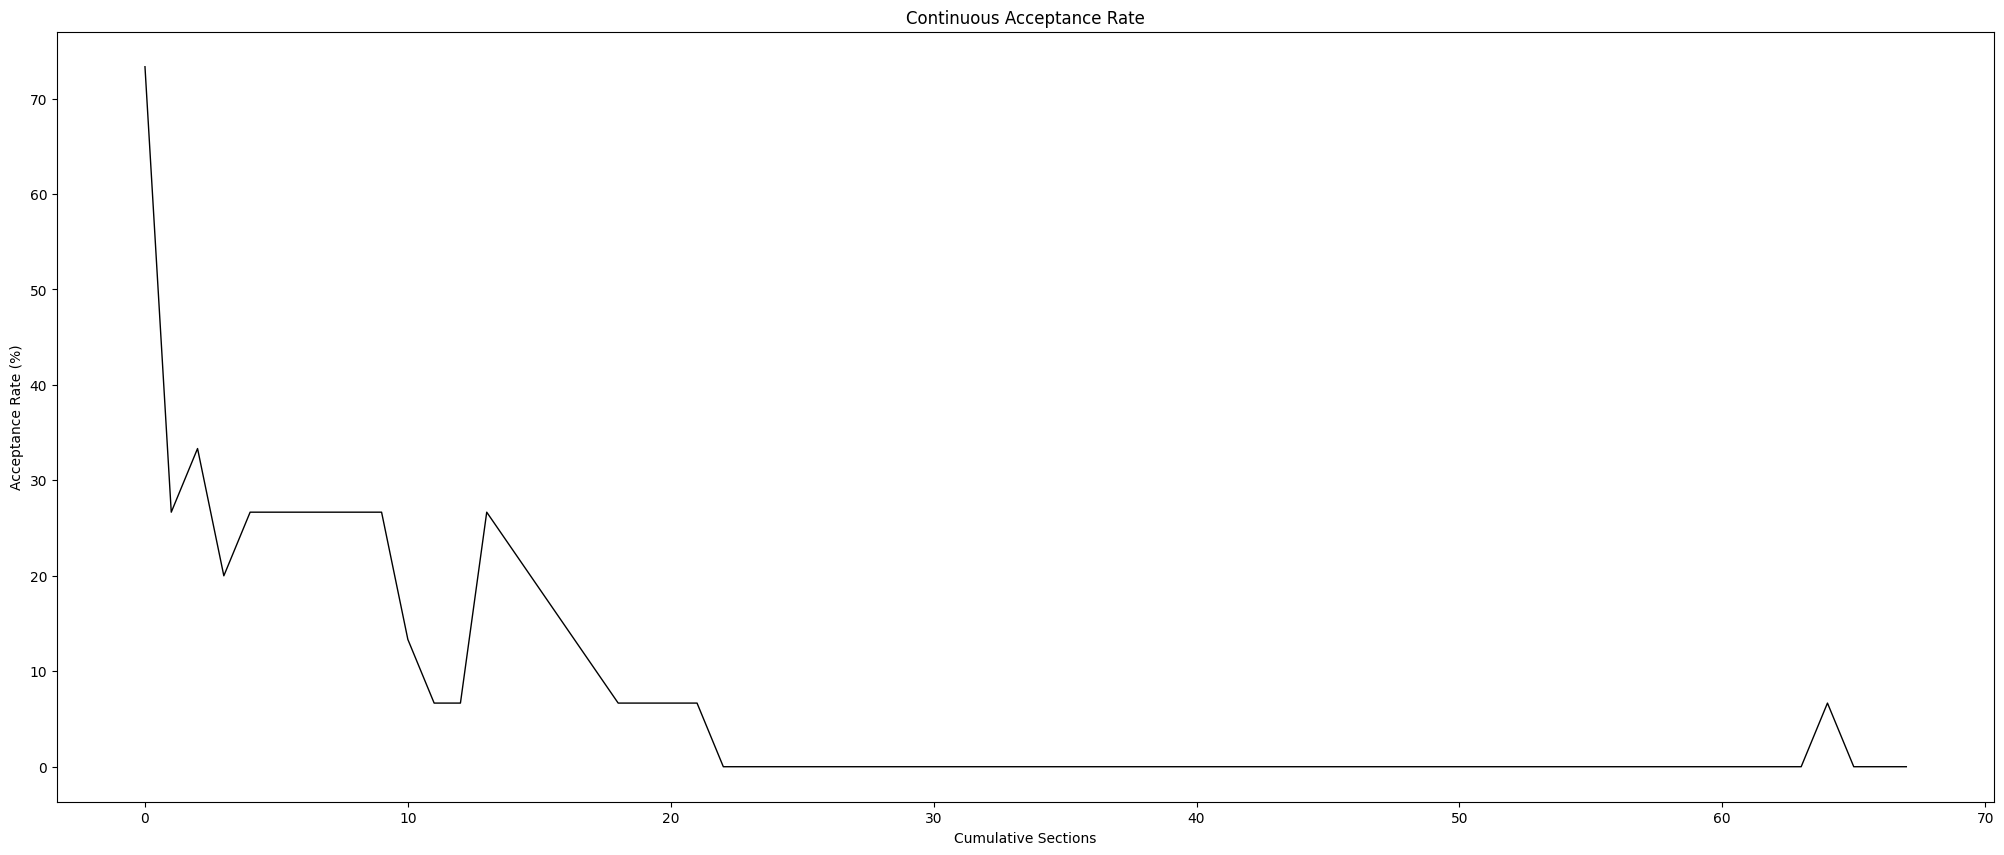

Processing file: numerosity_5d7472ad3bc4020015f3bb56_2025-03-06T19_12_57.668Z_20250317_14.02.json


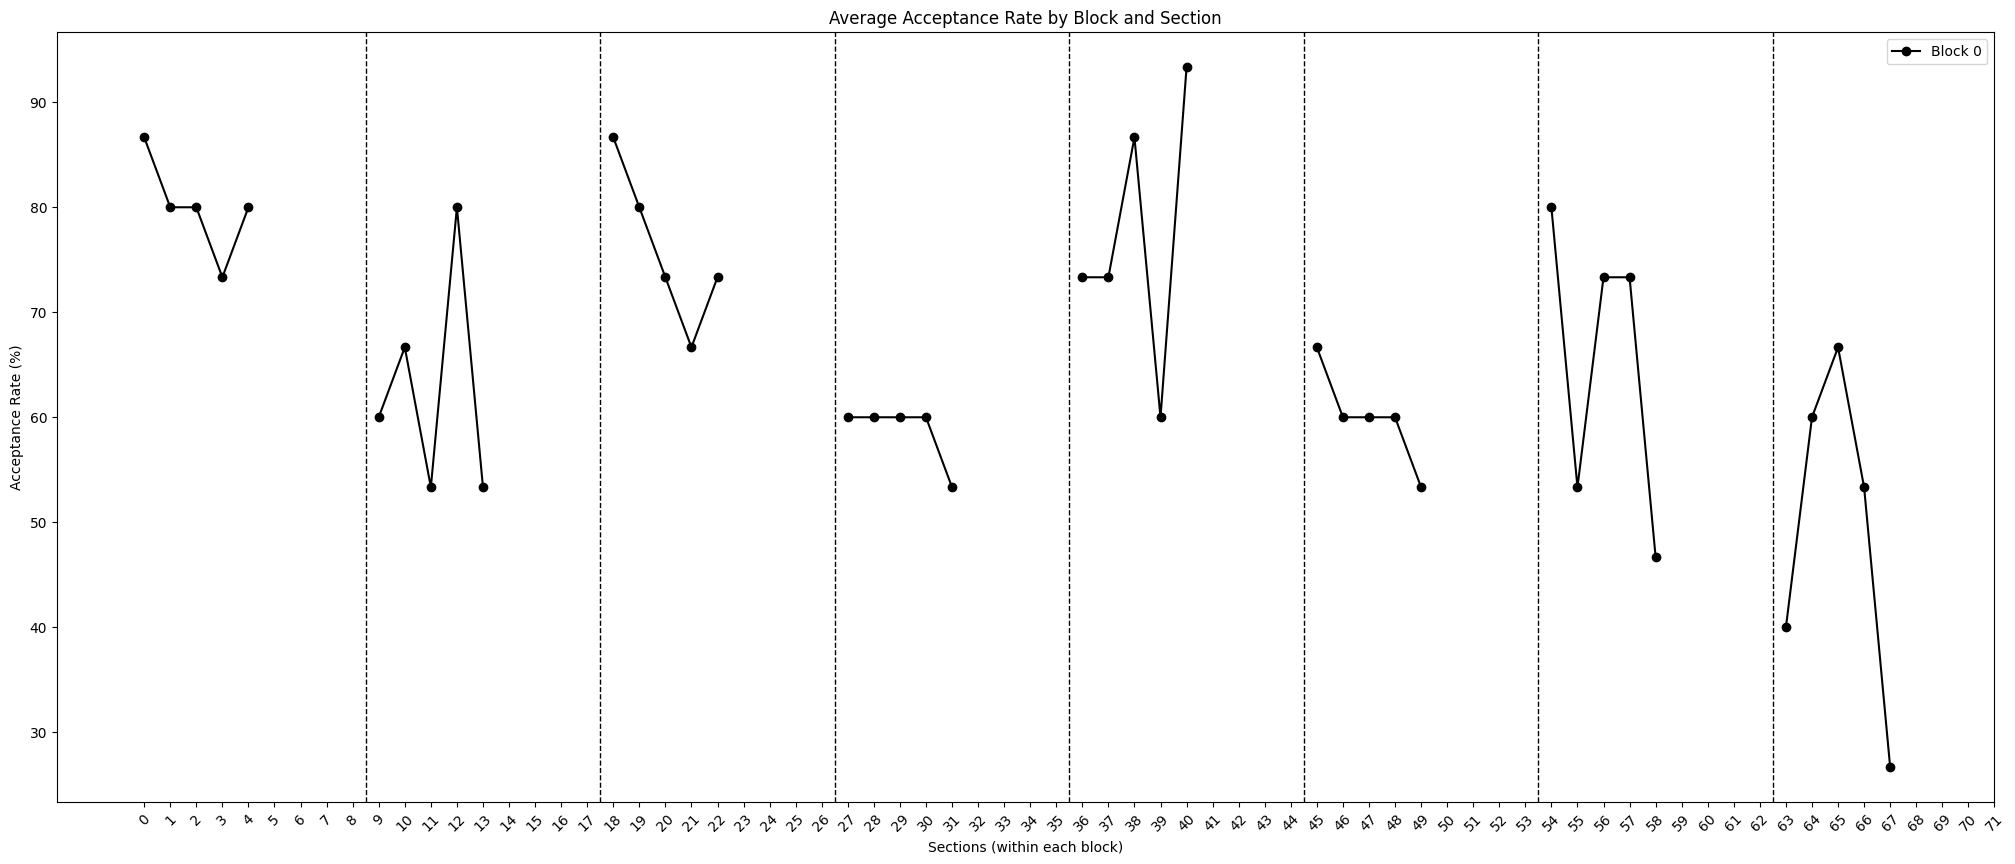

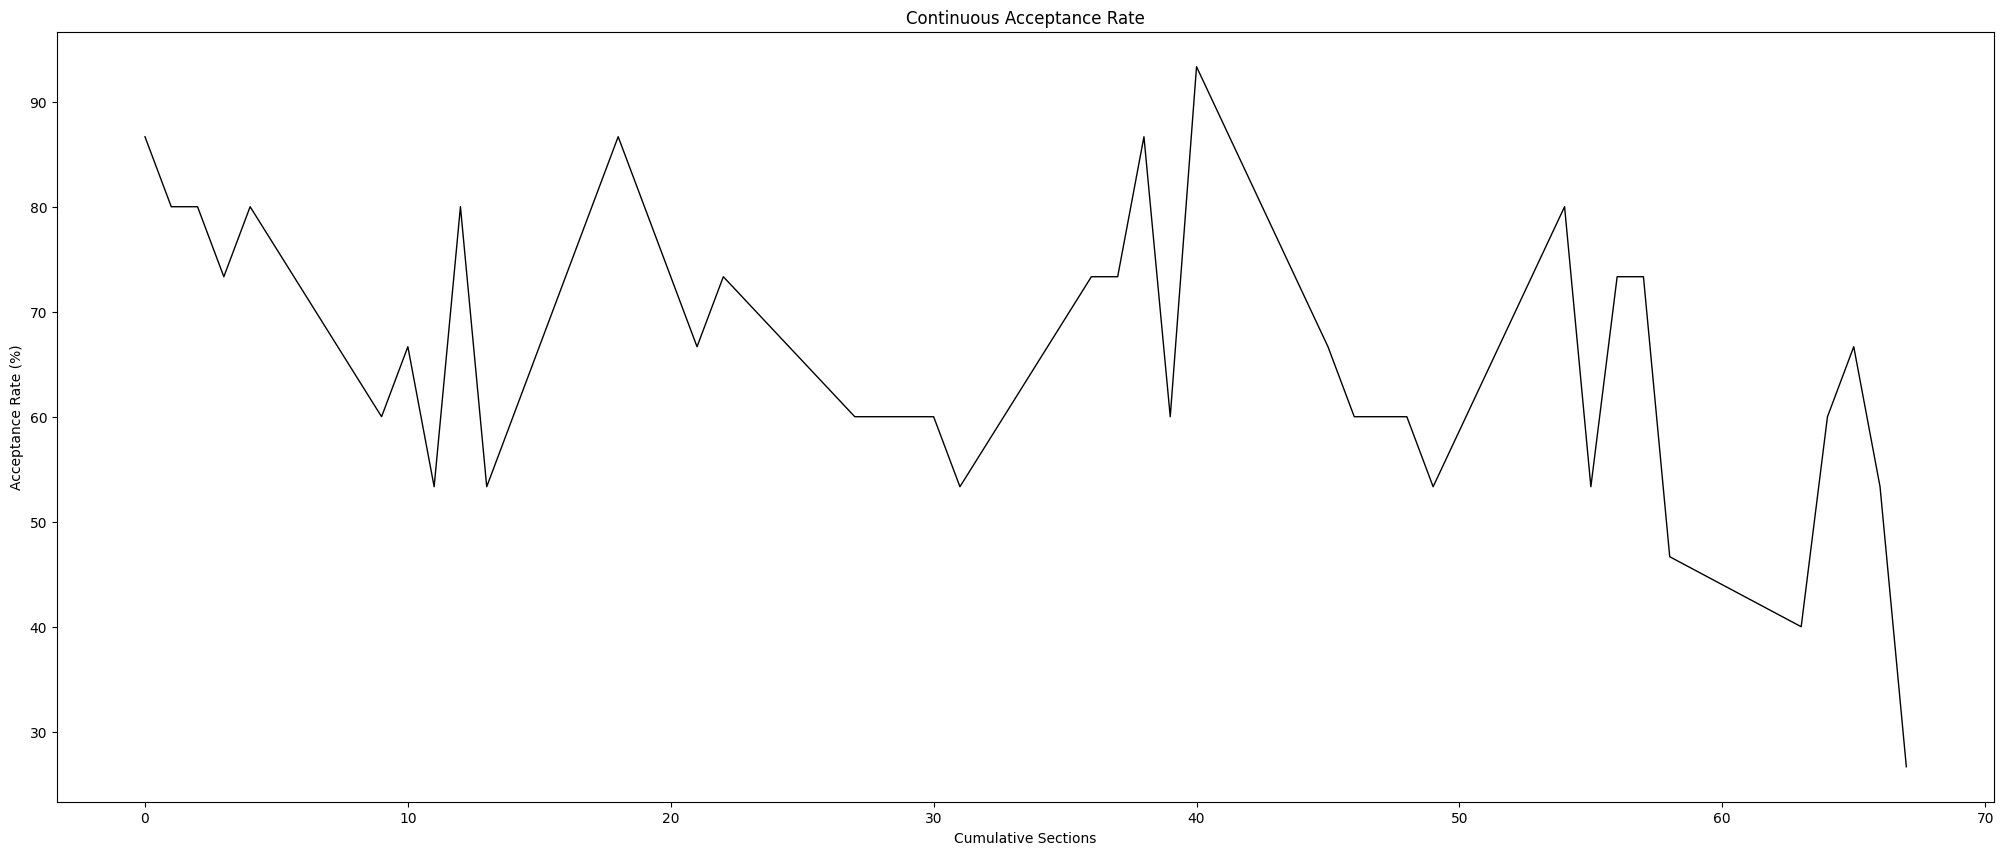

Processing file: numerosity_63cff262503b56190be3eb18_2025-03-06T21_13_32.192Z_20250317_14.02.json


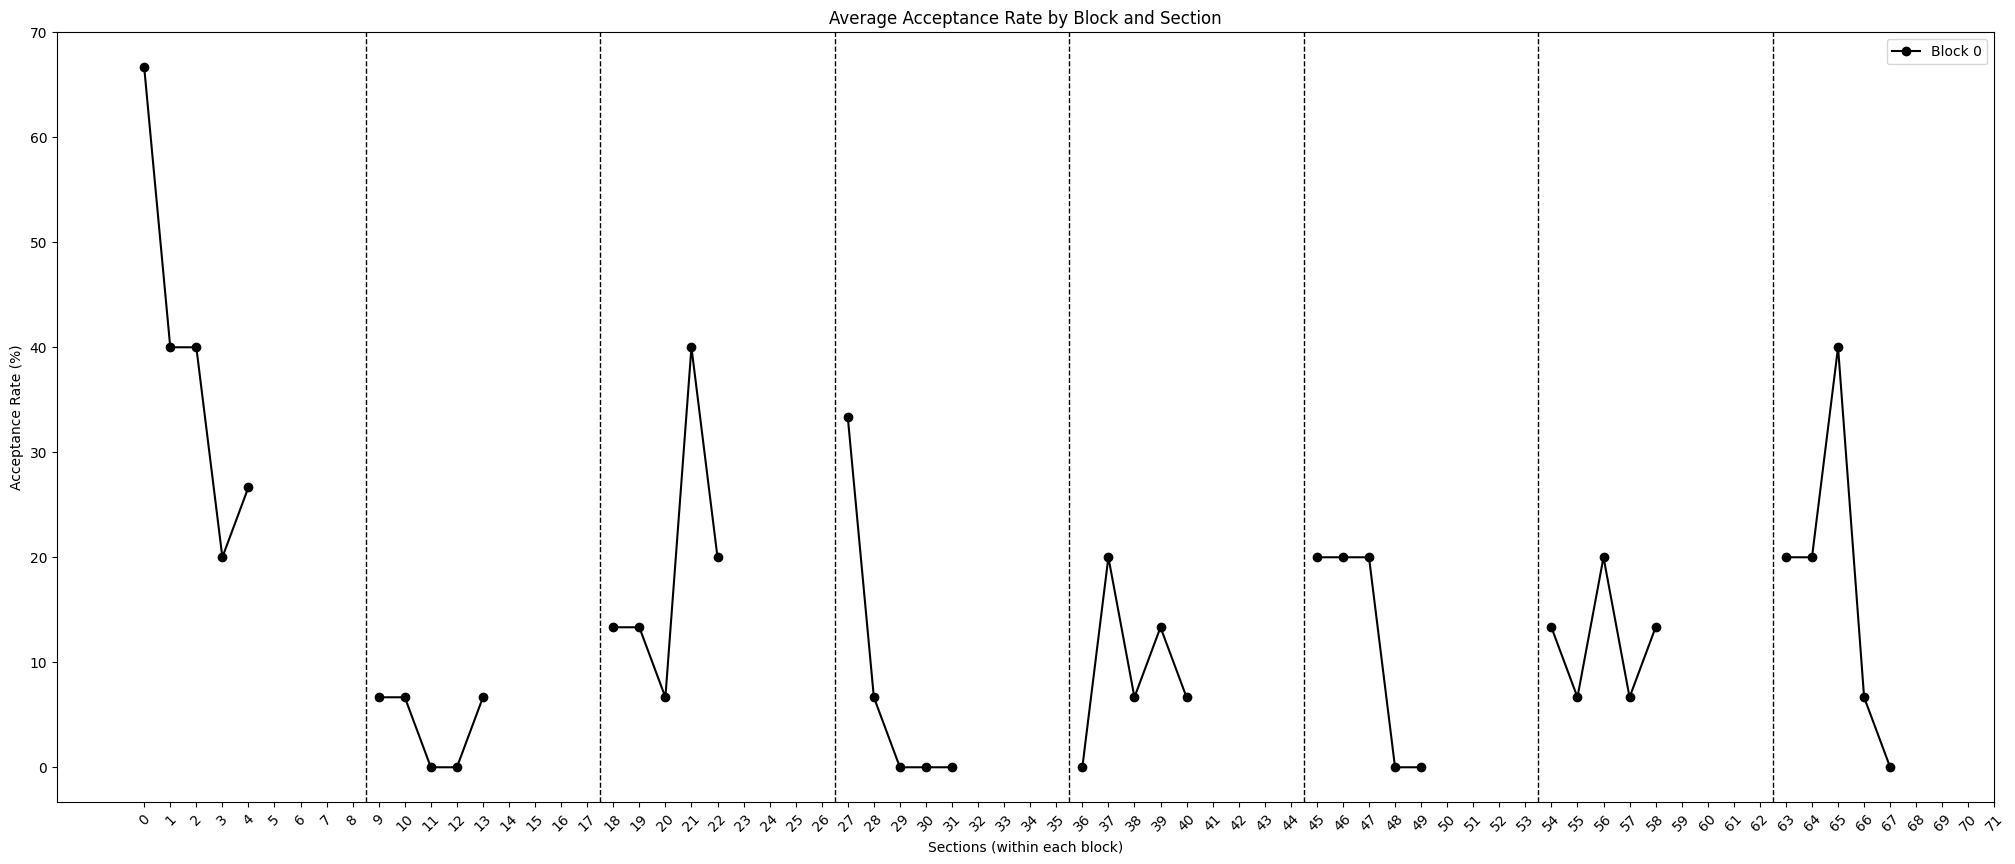

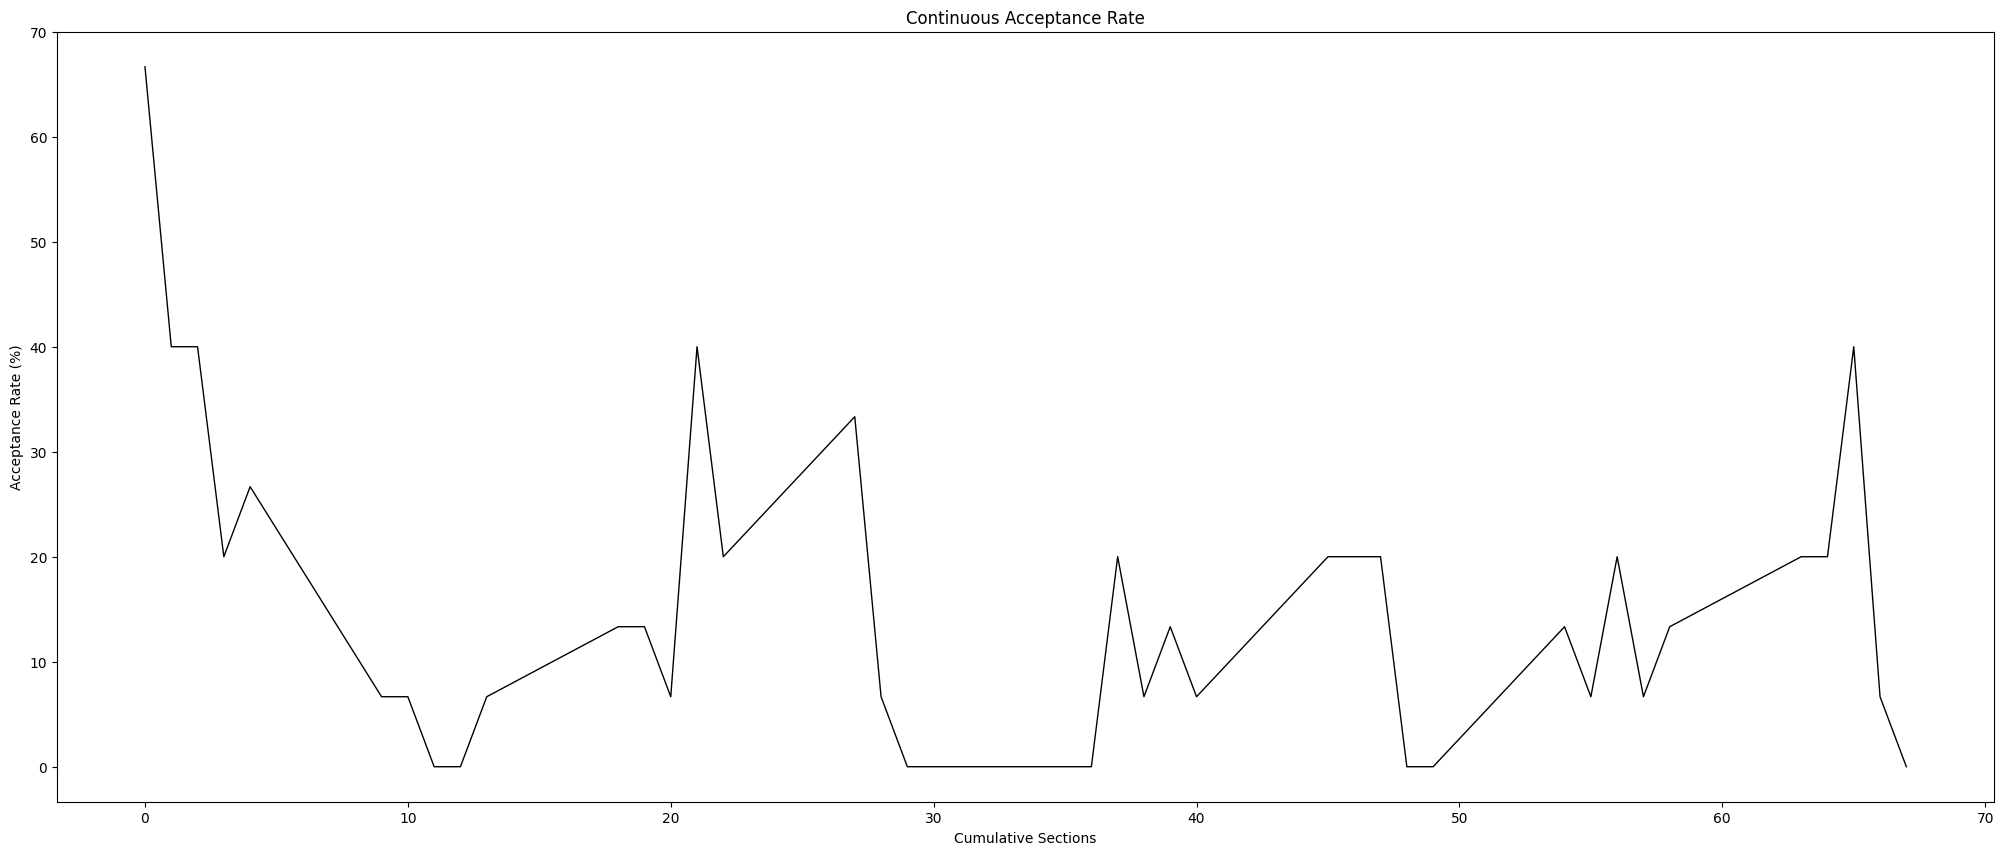

Processing file: numerosity_6562025a6e3331528cf8fb3d_2025-03-06T20_47_39.480Z_20250317_14.02.json


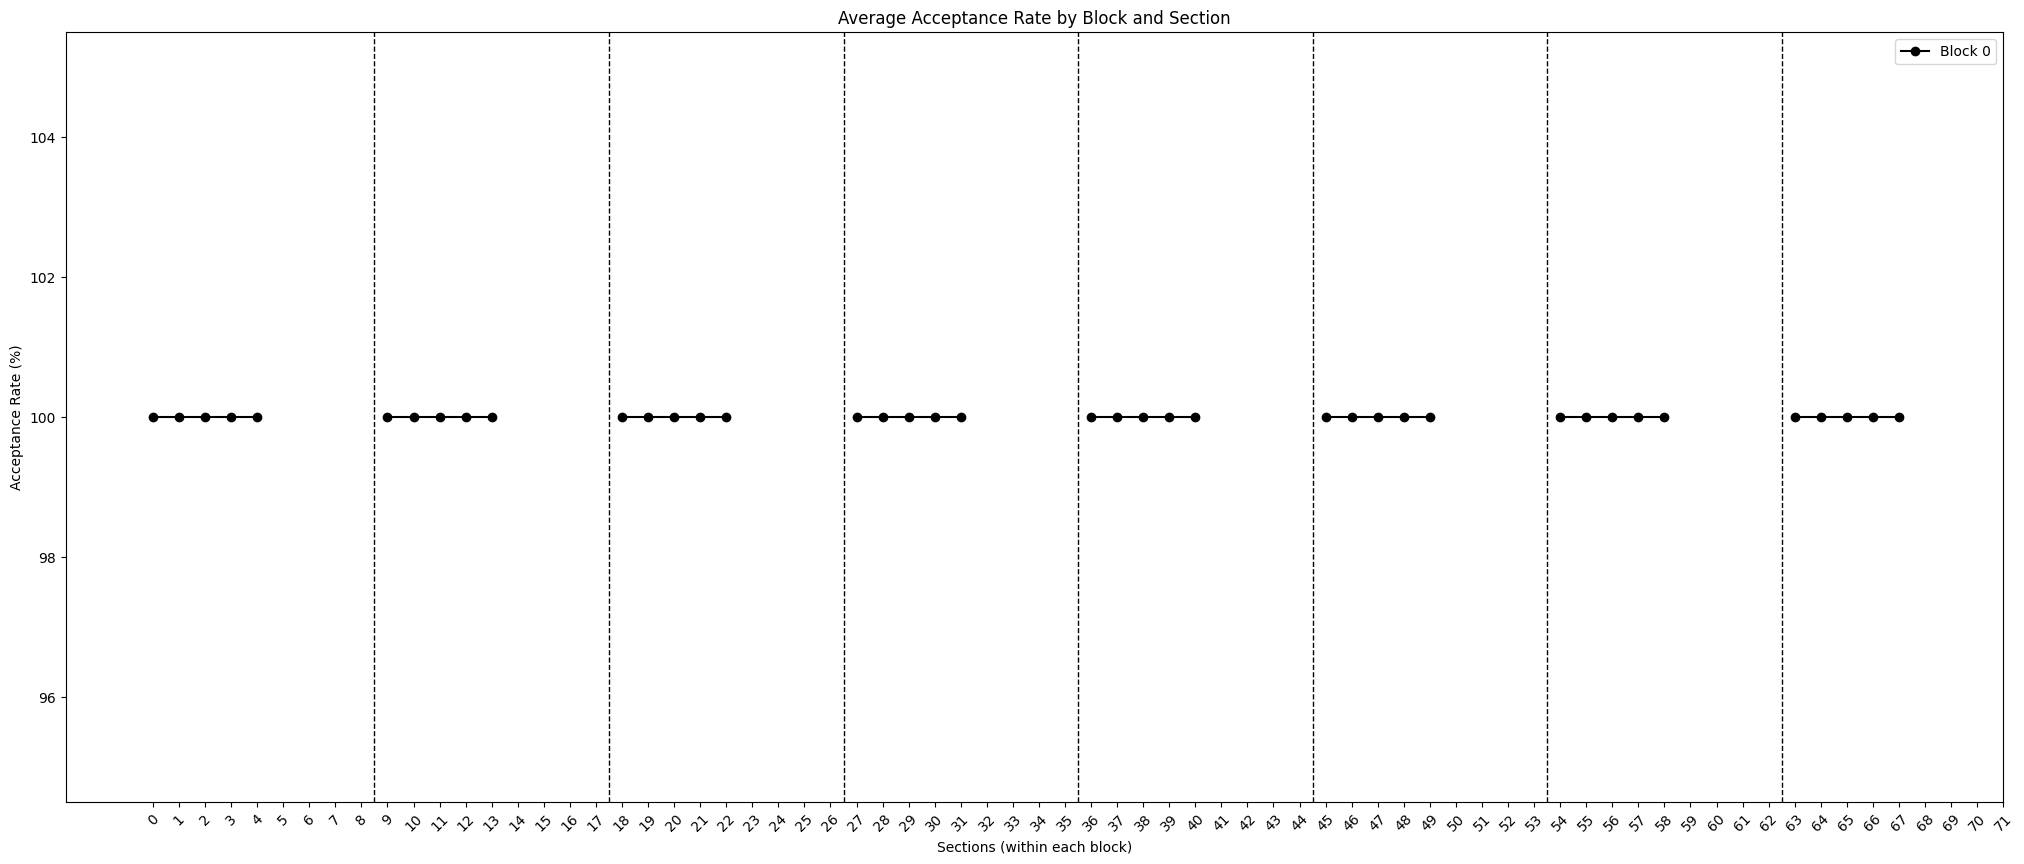

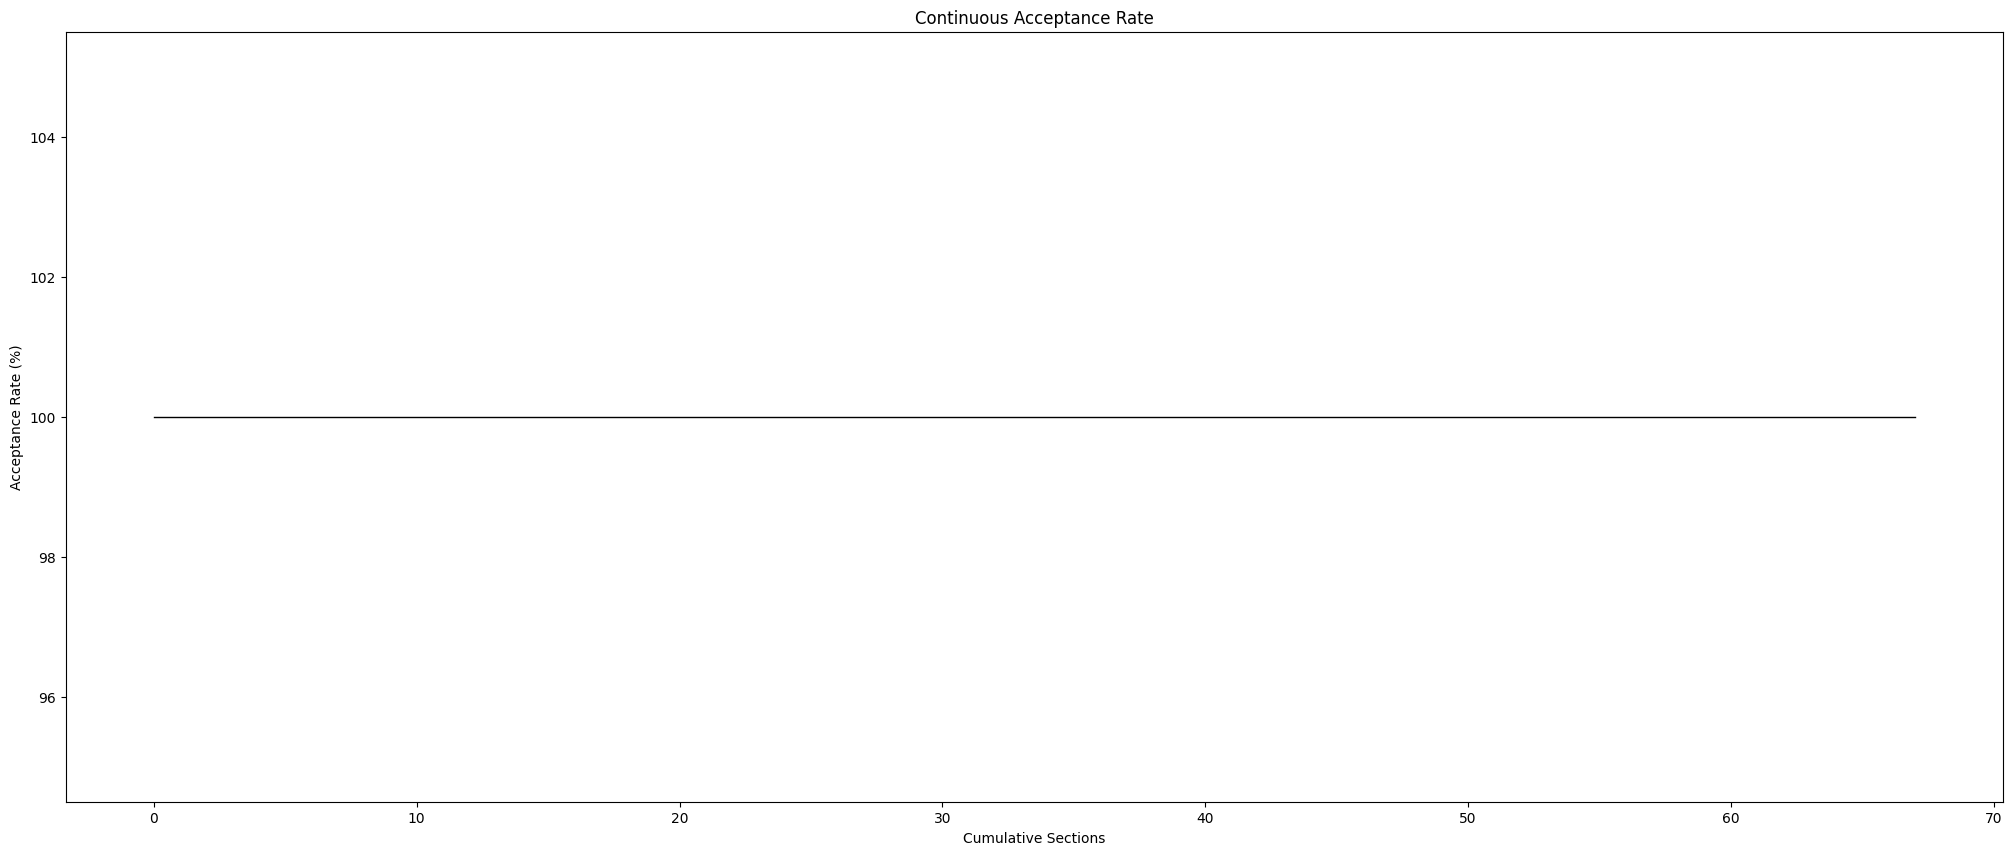

Processing file: numerosity_6612c945cebe319d923b80f8_2025-03-06T19_41_39.464Z_20250317_14.02.json


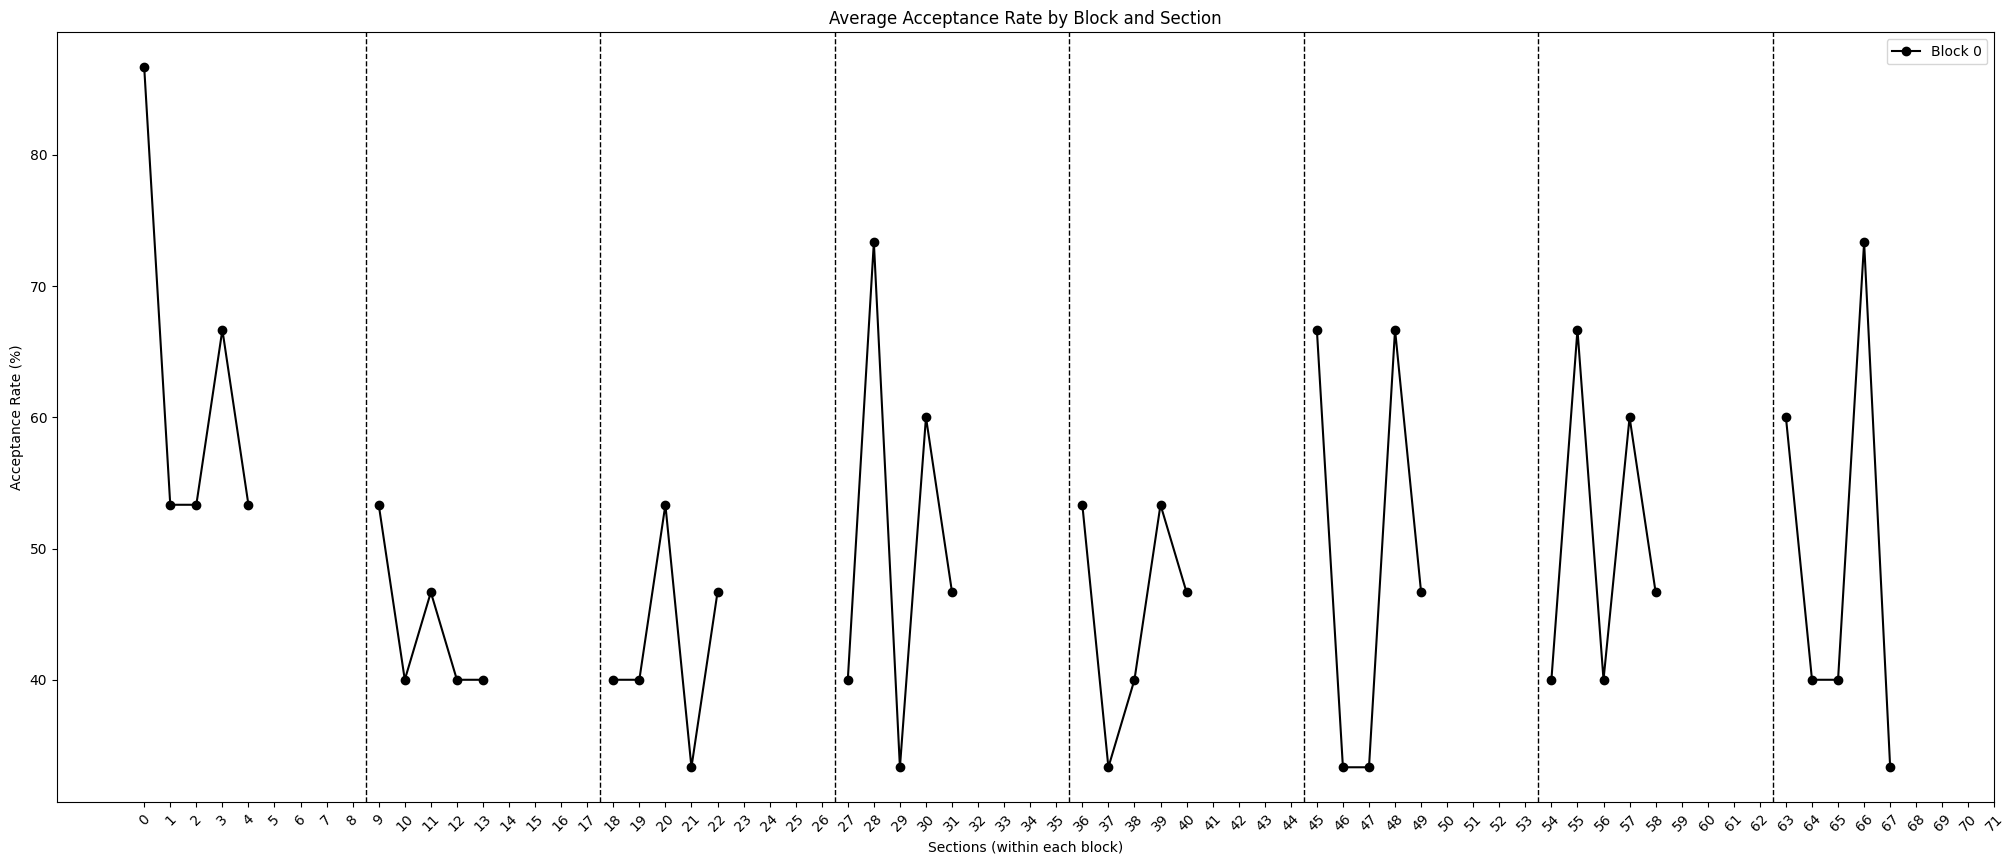

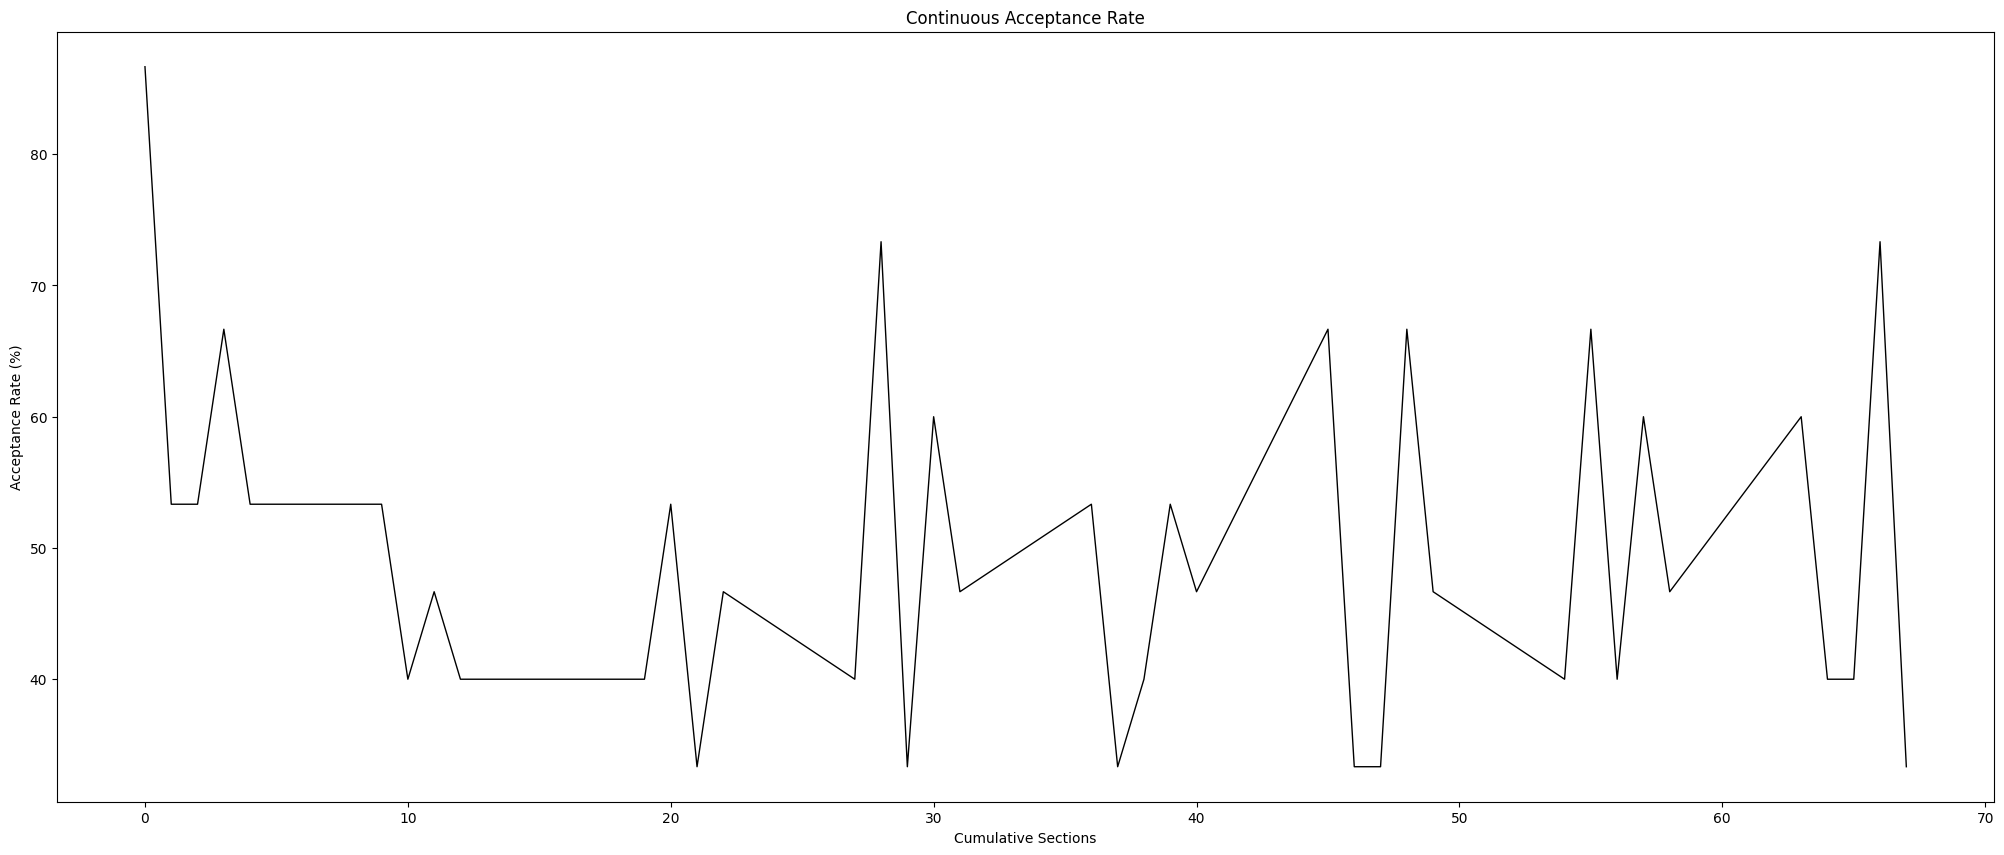

Processing file: numerosity_66b5a7ae36e5b931db863954_2025-03-05T19_14_11.010Z_20250306_09.03.json


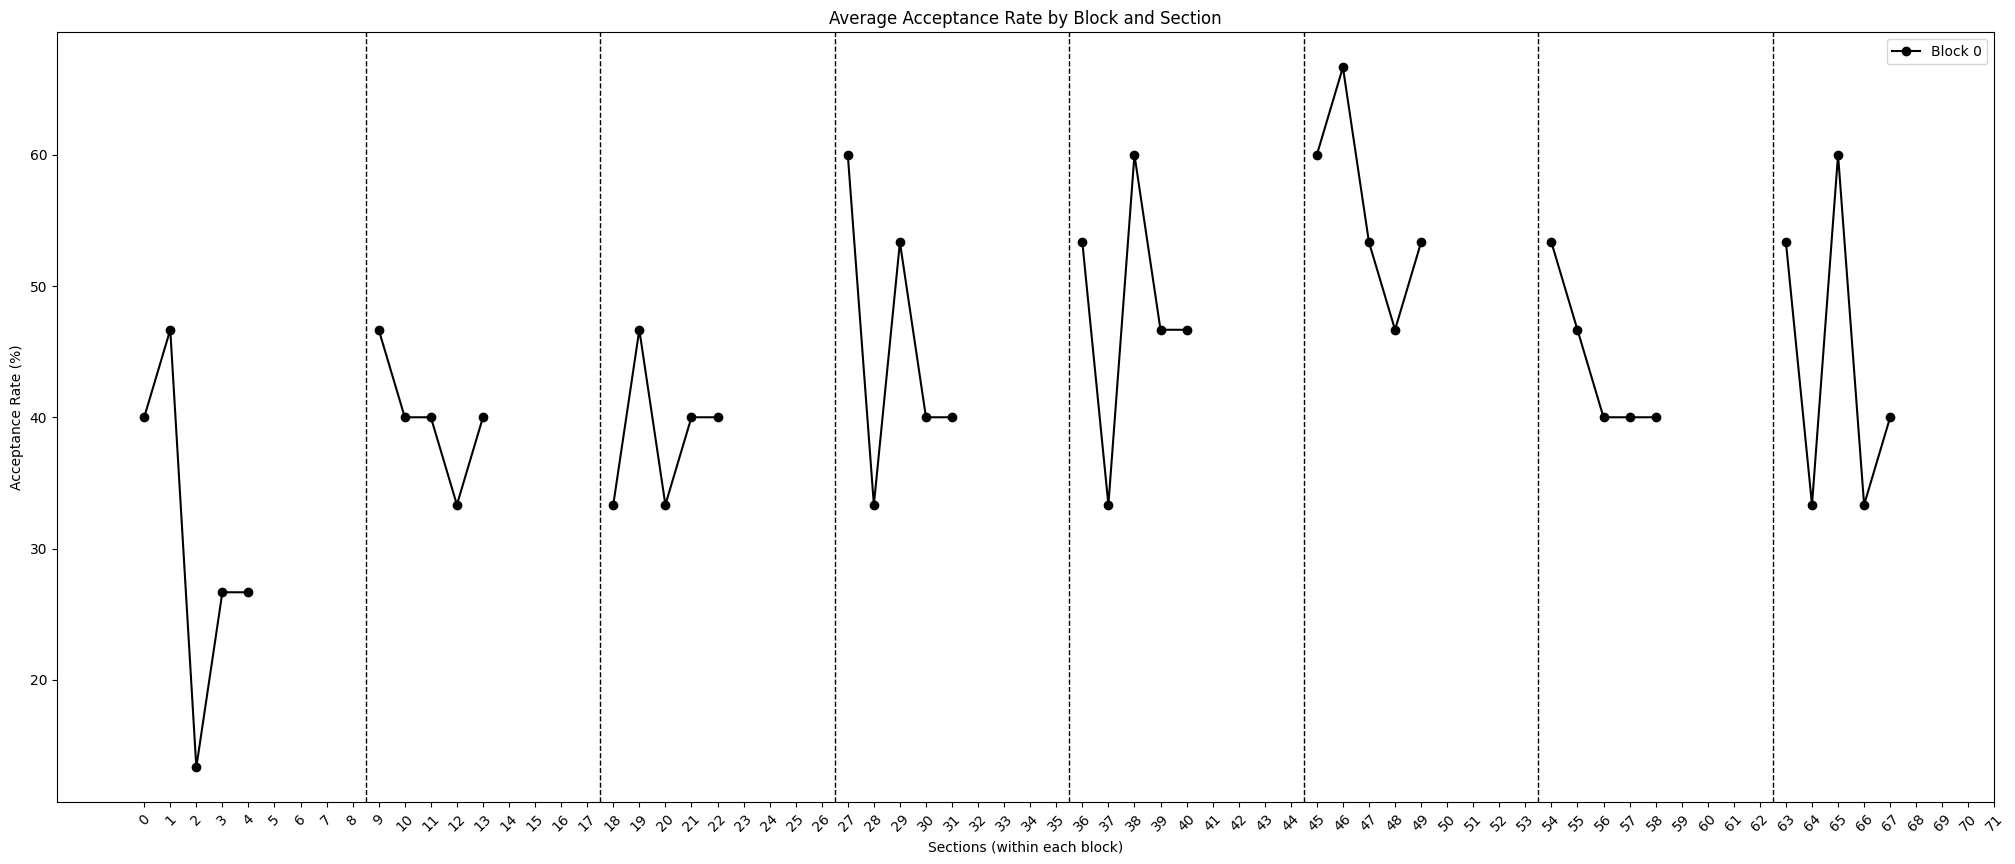

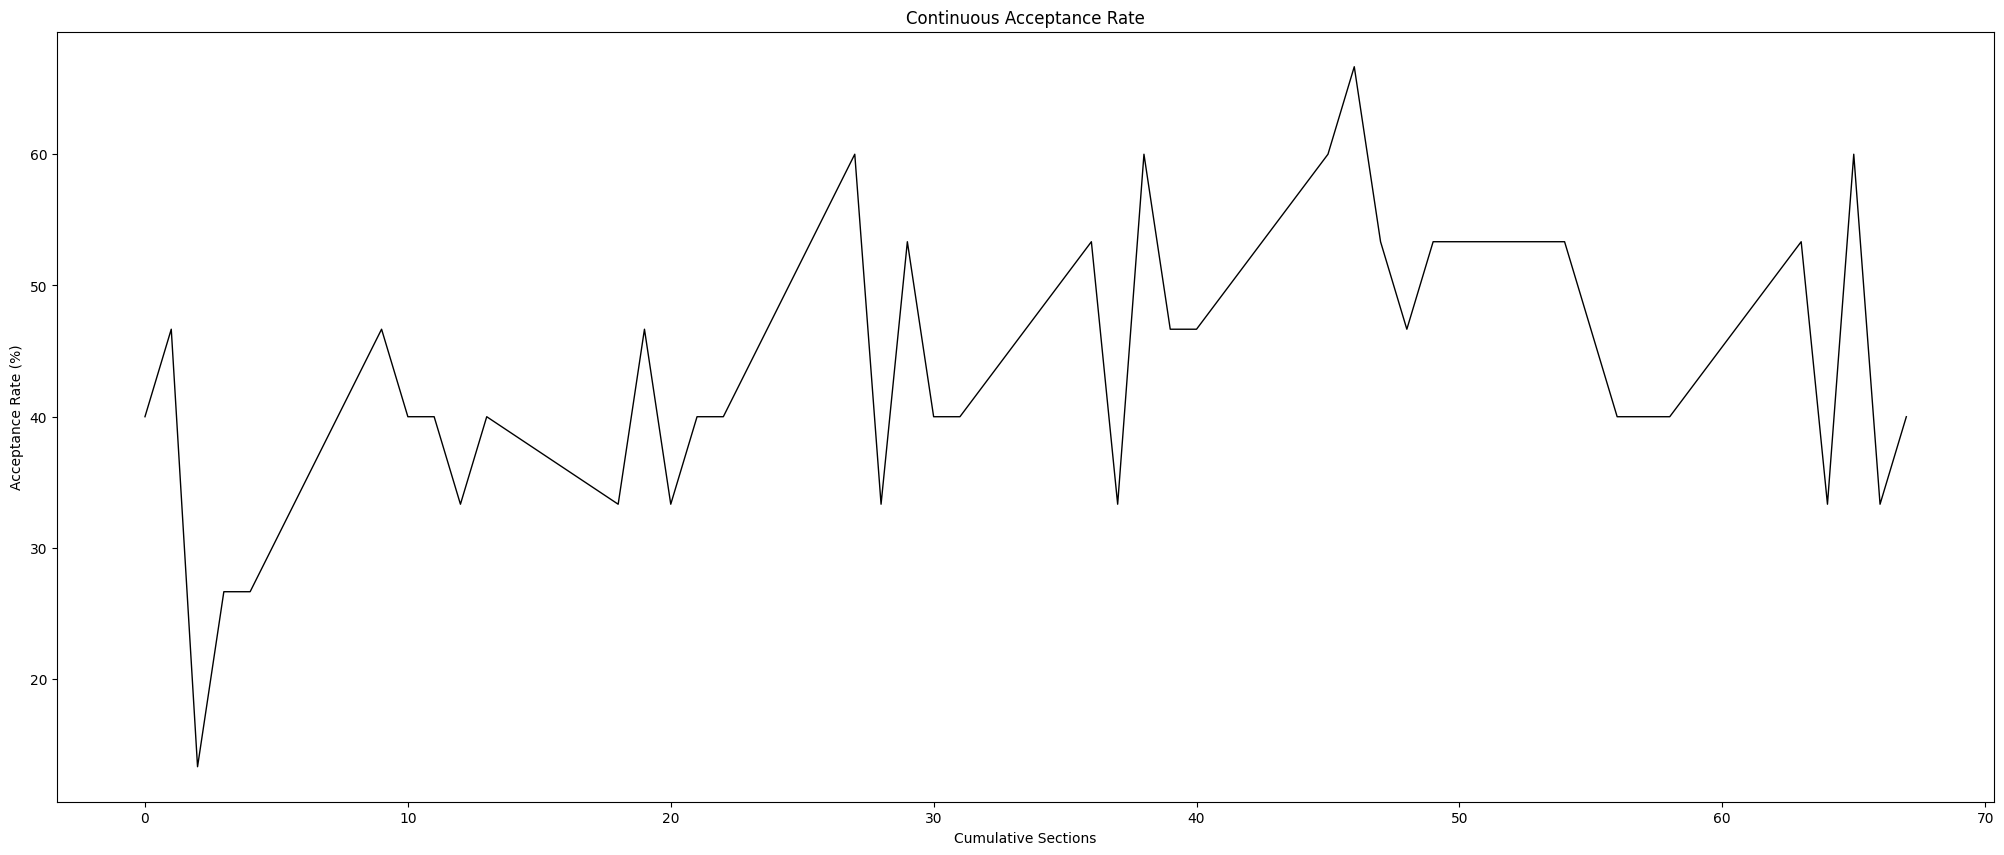

Processing file: numerosity_6773fc8590d7b54b0d580e6b_2025-03-06T21_43_44.383Z_20250317_14.02.json


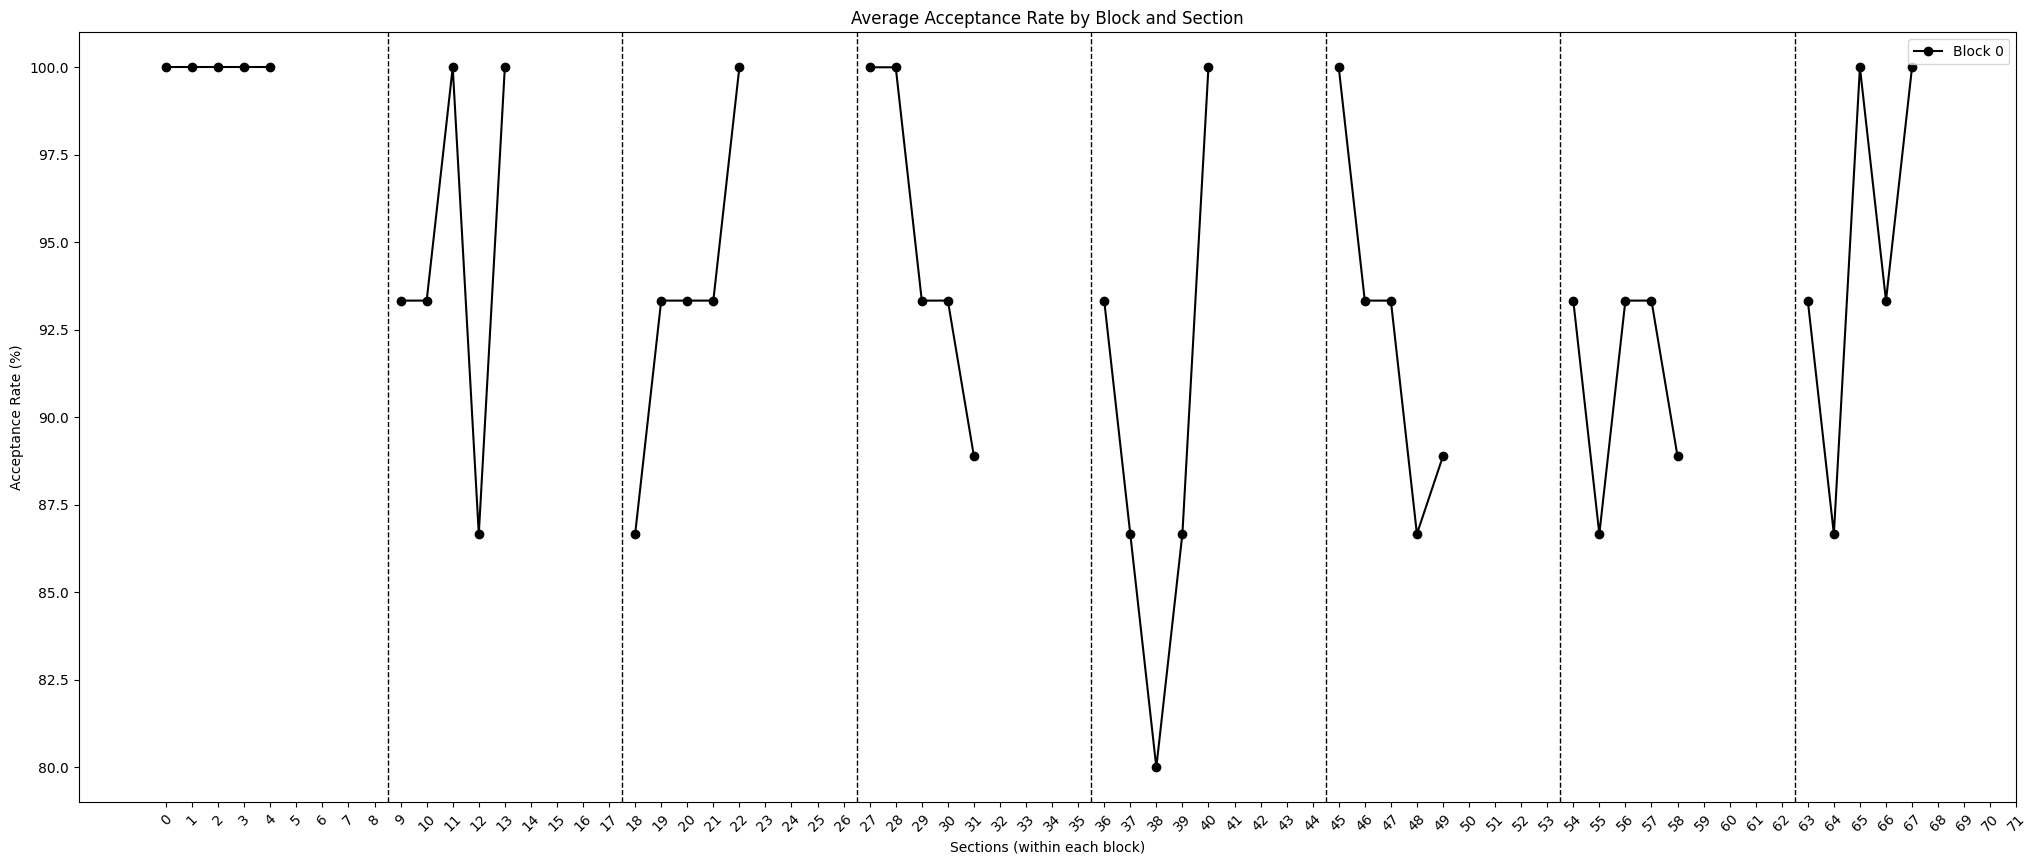

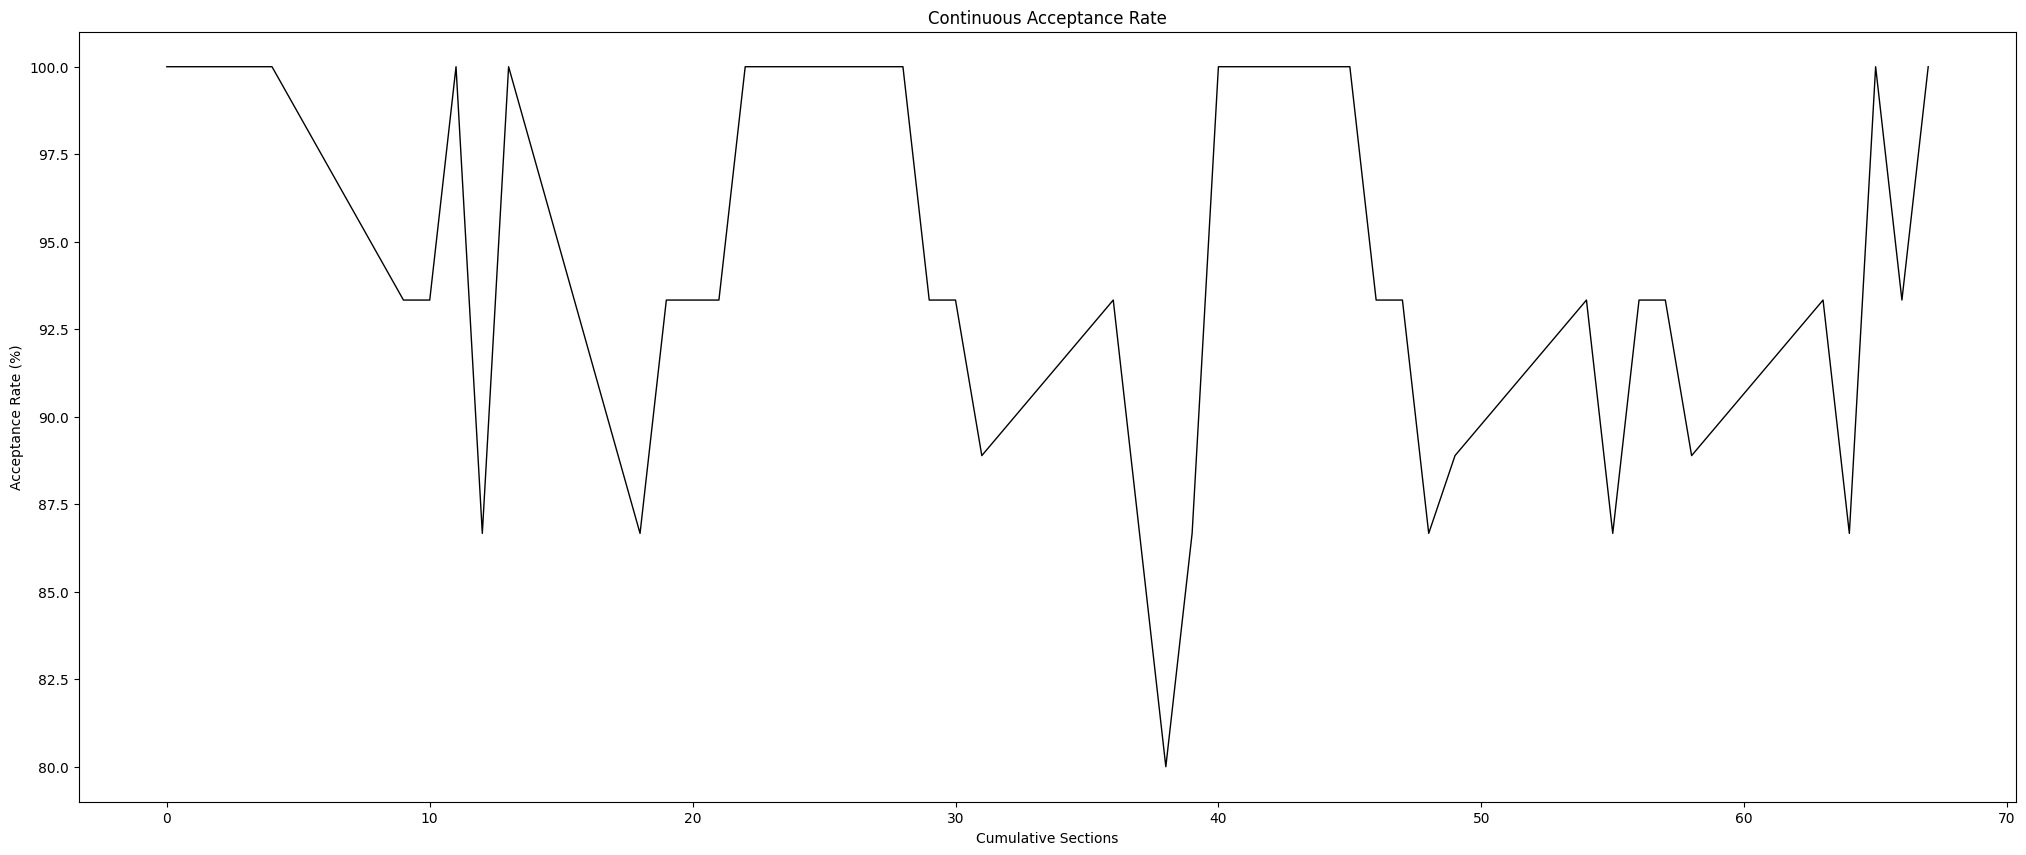

Processing file: numerosity_6785b7dd6705050739feb0ad_2025-03-05T19_38_14.876Z_20250306_09.03.json


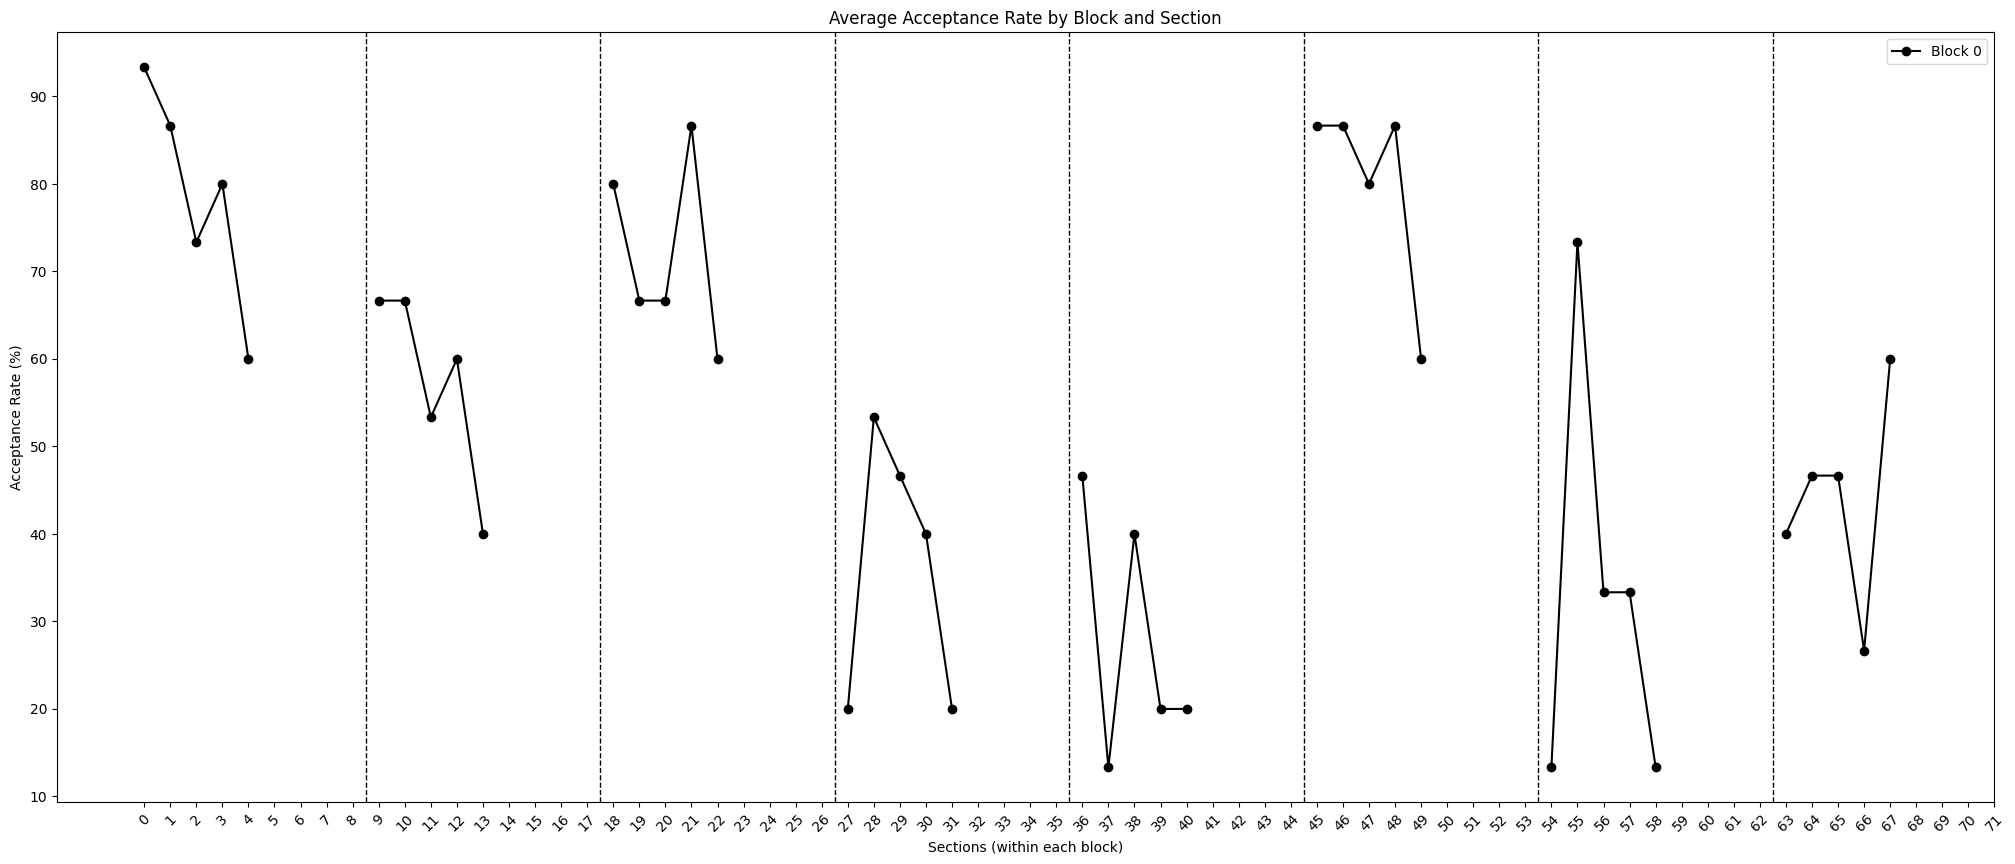

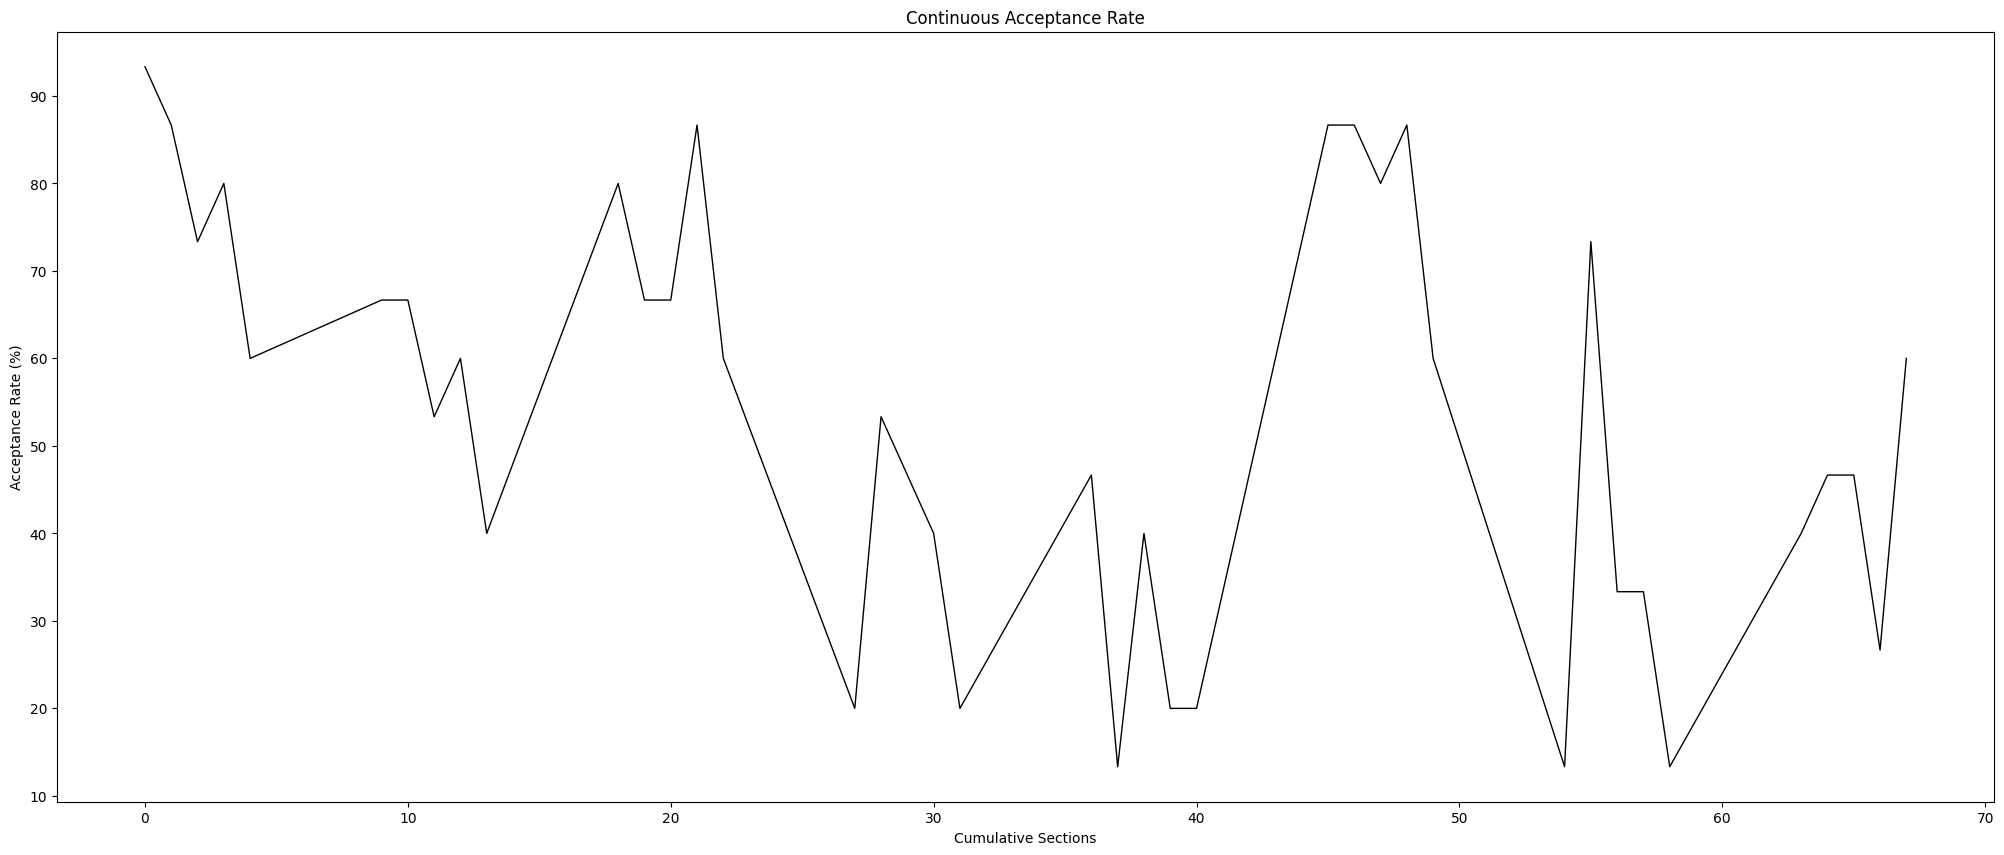

Processing file: numerosity_678fa07cd72c816bac76bda5_2025-03-05T19_24_37.980Z_20250306_09.03.json


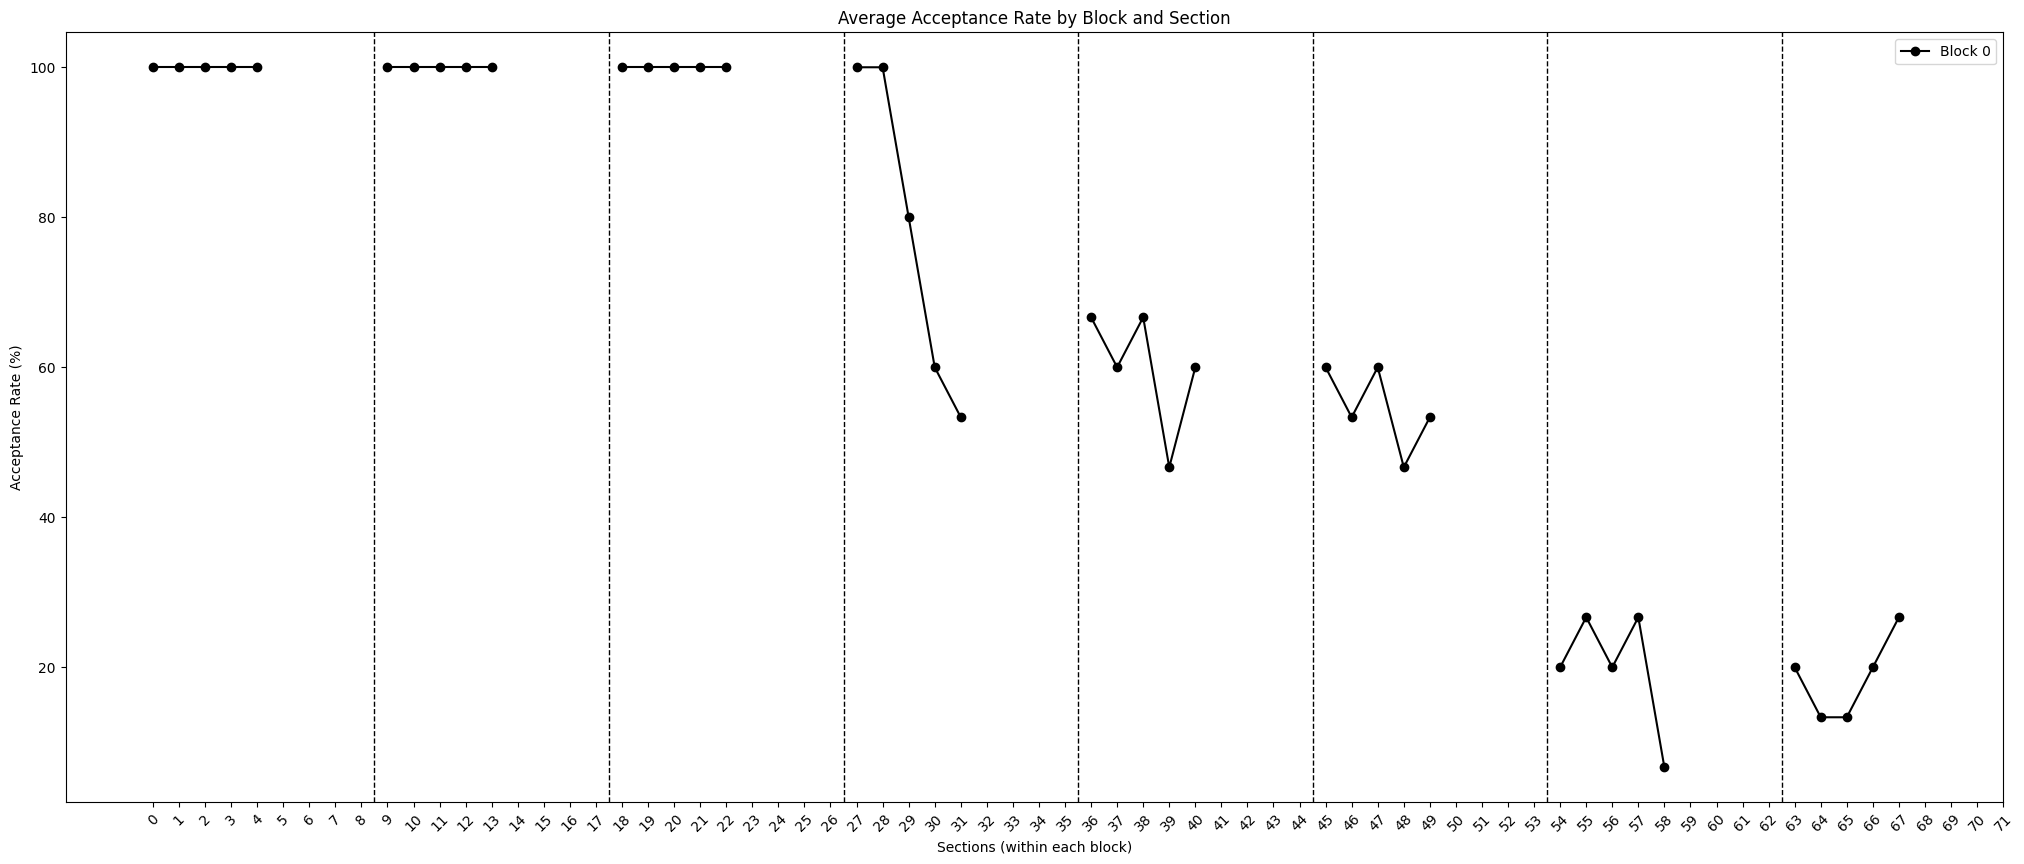

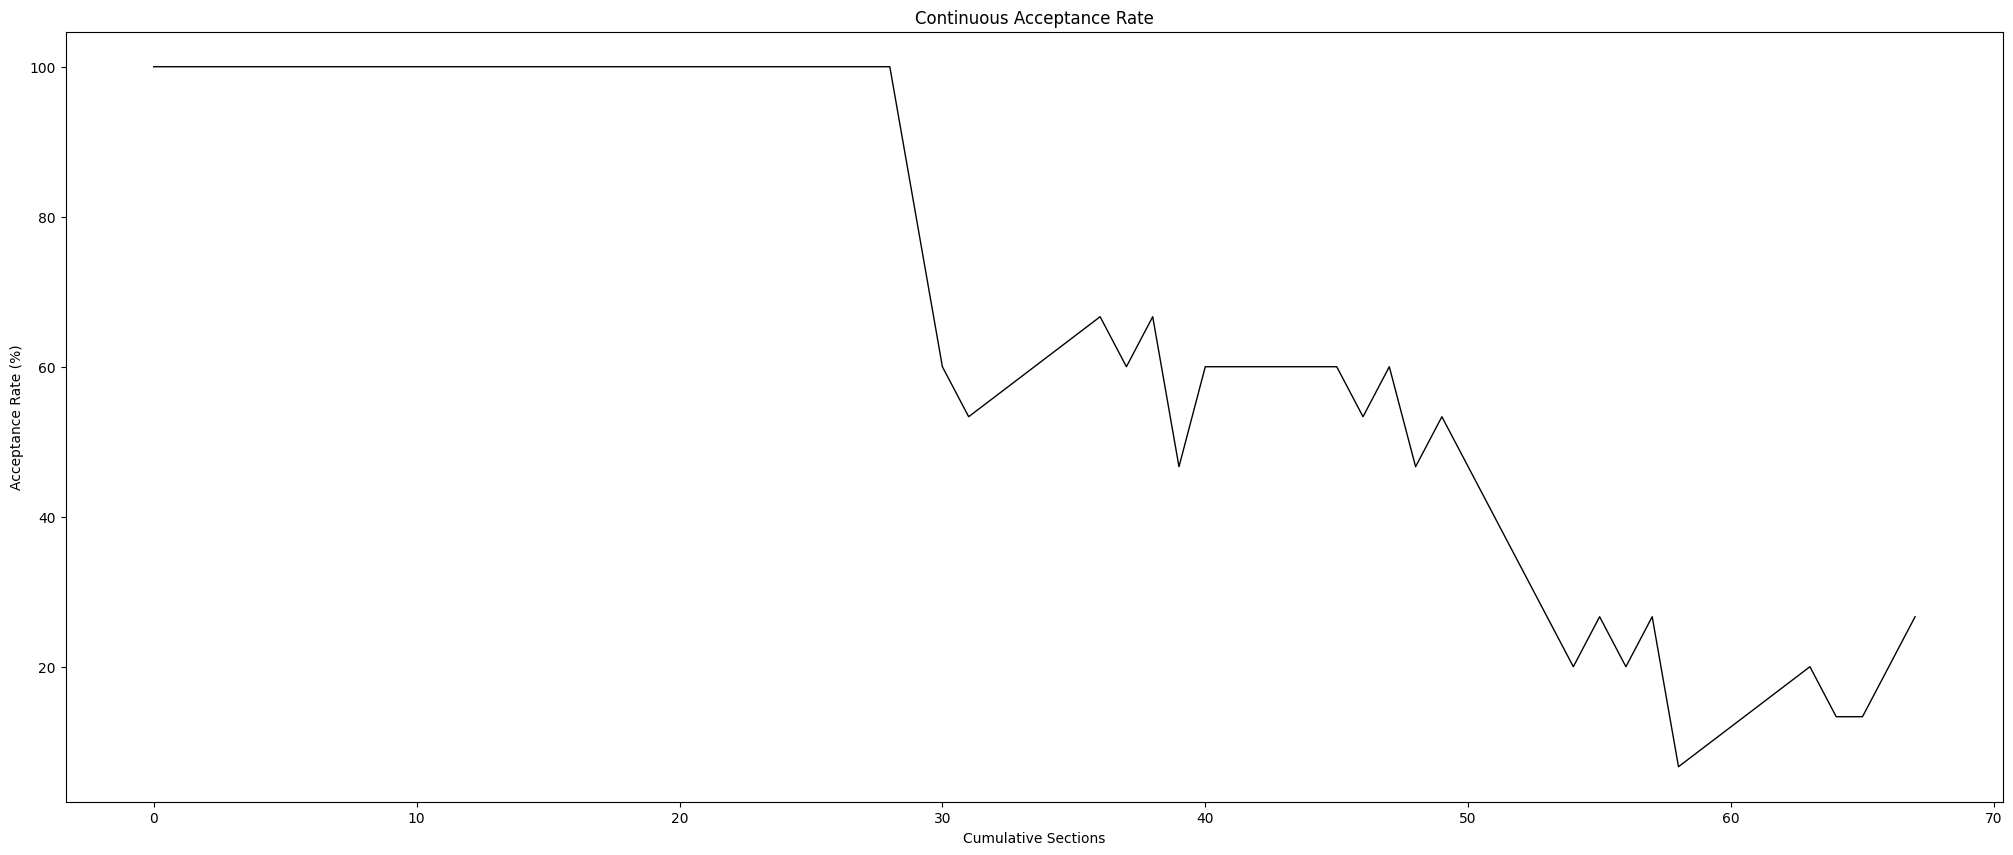

Processing file: numerosity_67ac2151e5b37e0b91a5af0e_2025-03-05T19_09_18.774Z_20250306_09.03.json


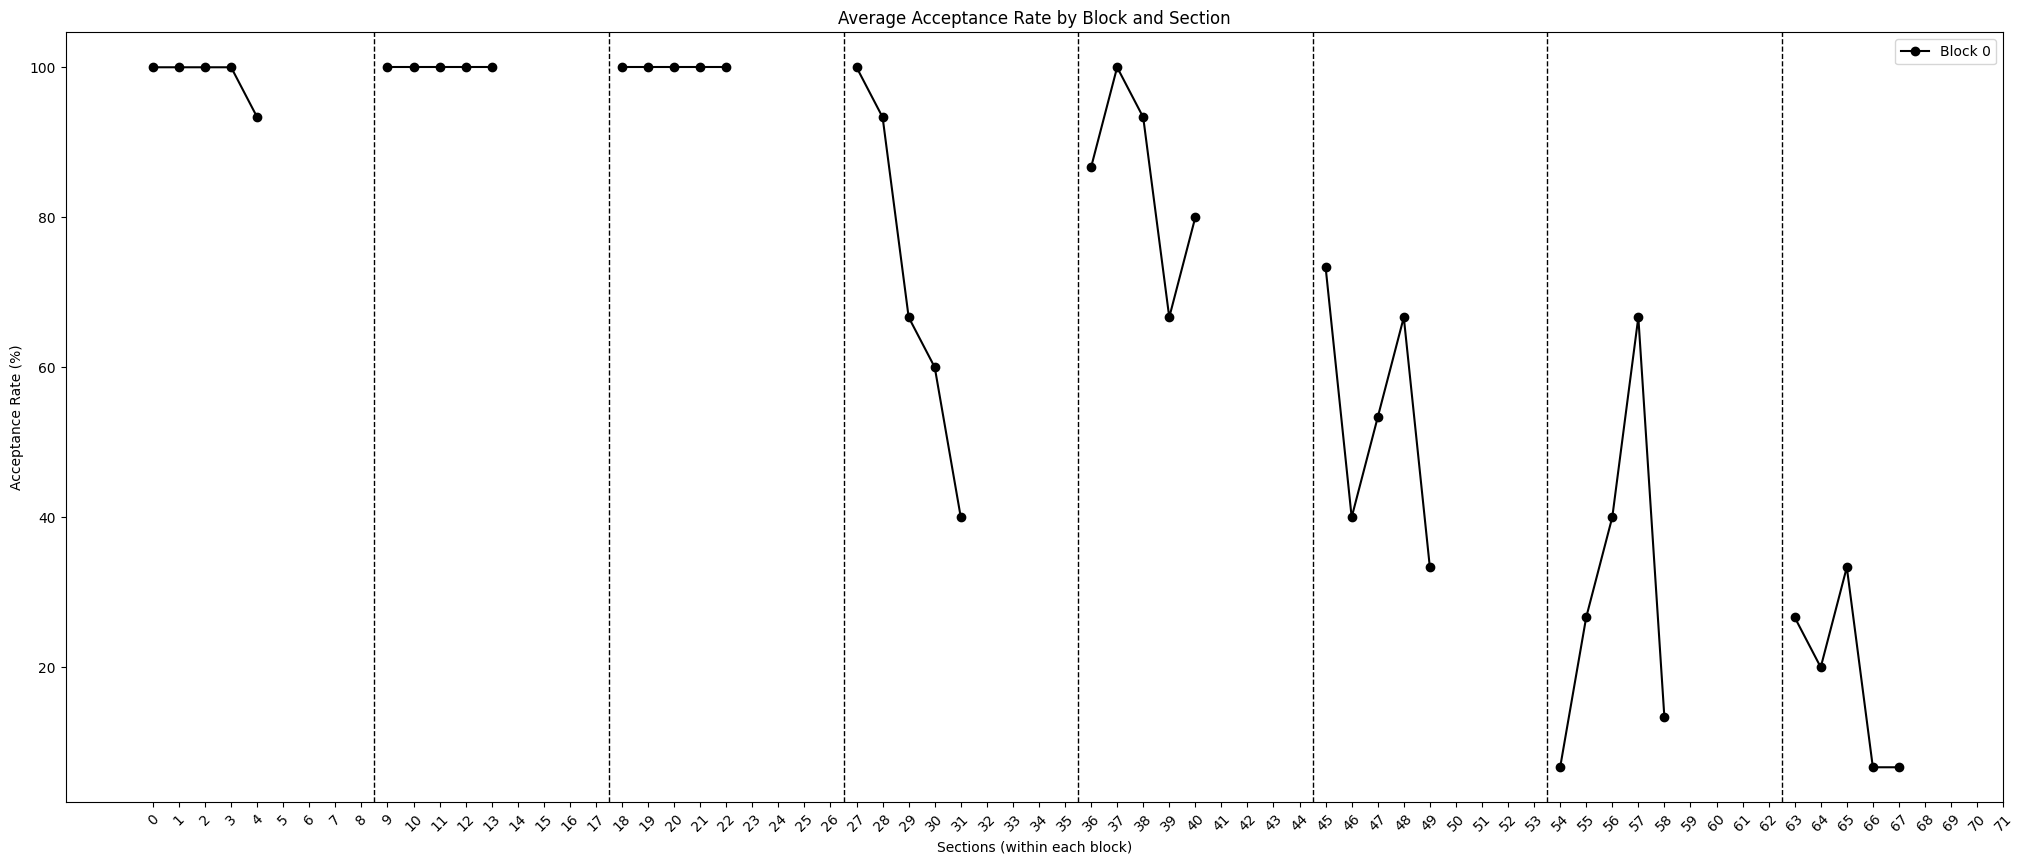

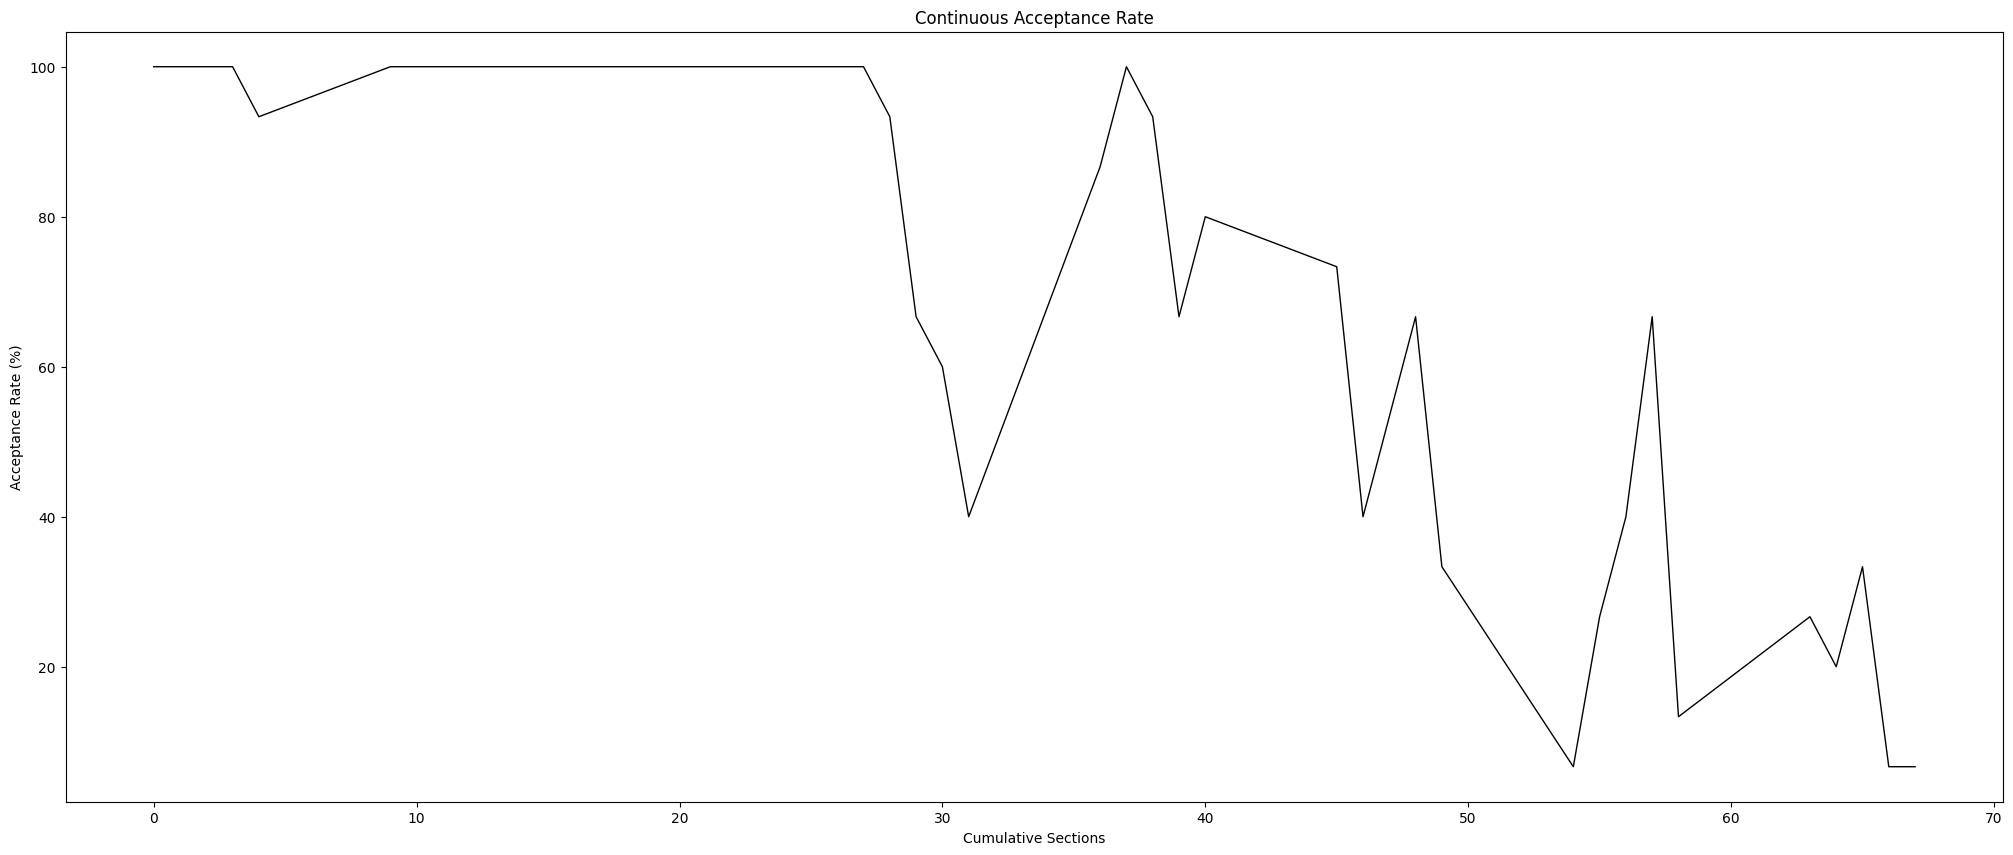

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

# Directory where CSV files are stored
folder_path = r'C:\Users\mijsters\Documents\Experiments\Cognitive EBDM\Online Study\Data Analysis\Pilot Data'

# Check if the data folder exists
if not os.path.exists(folder_path):
    print("Data folder does not exist.")
    exit()
else:
    print(f"Accessing data folder: {folder_path}")

# Process each JSON file
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        print(f"Processing file: {filename}")
        json_path = os.path.join(folder_path, filename)

        # Read JSON into DataFrame
        with open(json_path, "r", encoding="utf-8") as json_file:
            data = json.load(json_file)
            df = pd.DataFrame(data)

        # Step 1: Filter for accepted trials
        df_accept = df[df['accepted'].notna()].copy()
        num_rows = len(df_accept)
        
        if num_rows == 0:
            print(f"Skipping {filename}, no valid 'accepted' data.")
            continue

        block_size = num_rows // 8  # Divide into 8 blocks

        # Step 2: Create 8 ordered blocks
        blocks = [
            df_accept.iloc[i * block_size: (i + 1) * block_size] for i in range(7)
        ] + [df_accept.iloc[7 * block_size:]]  # Last block includes remainder

        results = []
        for block_index, block_data in enumerate(blocks):
            for section_index in range(9):
                section_data = block_data.iloc[section_index * 15:(section_index + 1) * 15]
                if len(section_data) == 0:
                    continue
                acceptance_rate = section_data['accepted'].sum() / len(section_data) * 100
                results.append({
                    'block_index': block_index,
                    'section_index': section_index,
                    'acceptance %': acceptance_rate
                })

        result_df = pd.DataFrame(results)
        if result_df.empty:
            print(f"Skipping {filename}, no valid sections found.")
            continue

        # Step 3: Compute mean acceptance % by block and section
        average_acceptance_df = result_df.groupby(['block_index', 'section_index'], as_index=False)['acceptance %'].mean()

        # Figures
        plt.figure(figsize=(25, 10))

        # Plot each block separately
        for block_index in sorted(average_acceptance_df['block_index'].unique()):
            block_data = average_acceptance_df[average_acceptance_df['block_index'] == block_index]
            x_positions = [block_index * 9 + section for section in block_data['section_index']]
            plt.plot(x_positions, block_data['acceptance %'], marker='o', color='black', label=f'Block {block_index}' if block_index == 0 else "")

        # Add vertical lines to separate blocks
        for block_index in range(1, average_acceptance_df['block_index'].max() + 1):
            plt.axvline(x=block_index * 9 - 0.5, color='black', linestyle='--', linewidth=1)

        plt.title(f'Average Acceptance Rate by Block and Section')
        plt.xlabel('Sections (within each block)')
        plt.ylabel('Acceptance Rate (%)')
        plt.xticks(range(0, 9 * (average_acceptance_df['block_index'].max() + 1)), rotation=45)
        plt.legend()
        
        # Use non-blocking display
        plt.pause(0.01)
        plt.close() 

        # Continuous plot 
        plt.figure(figsize=(25, 10))
        average_acceptance_df['x_position'] = average_acceptance_df['block_index'] * 9 + average_acceptance_df['section_index']
        plt.plot(
            average_acceptance_df['x_position'],
            average_acceptance_df['acceptance %'],
            color='black',
            linestyle='-',
            linewidth=1
        )
        plt.title(f'Continuous Acceptance Rate')
        plt.xlabel('Cumulative Sections')
        plt.ylabel('Acceptance Rate (%)')
        
        plt.pause(0.01)
        plt.close()  
